<img 
  class="-inro-notebook-icon-inro-small" 
  style="margin-left: 0; margin-bottom: 15px;">
  © Copyright 2018, INRO.
</img>

Please note that this notebook should be run on a fresh copy of the Winnipeg demonstration project; otherwise you may encounter an error.

In [ ]:
%modeller --show_output false

#Emme Notebook and Modeller Guide
This notebook provides some examples of the use of the Emme Notebook and Modeller API. 

##Contents

<a href="#Introduction">Introduction</a>

<a href="#Scripting-tools">Scripting tools</a>
- <a href="#Tool-drag-and-drop">Tool drag-and-drop</a>
- <a href="#Tool-state">Tool state</a>
- <a href="#Tool-specifications">Tool specifications</a>
- <a href="#Tool-call-method">Tool call method</a>

<a href="#Visualizations-and-reports">Visualizations and reports</a>
- <a href="#Logbook">Logbook</a>
- <a href="#Worksheets">Worksheets</a>

<a href="#Database-API">Database API</a>

<a href="#Network-API">Network API</a>
- <a href="#Creating-elements">Creating elements</a>
- <a href="#Network-calculations">Network calculations</a>
- <a href="#Deleting-elements">Deleting elements</a>
- <a href="#Publishing-network">Publishing network</a>

<a href="#Matrix-API">Matrix API</a>
- <a href="#Matrix-calculations">Matrix calculations</a>
- <a href="#Integration-with-Numpy">Integration with Numpy</a>

<a href="#Conclusion">Conclusion</a>

##Introduction

The Emme Notebook allows the combination of interactive use of Emme with Python code.
When entering code in a cell, you can use <b>tab</b> for auto-complete of variable names.

A cell is executed using the <i>run cell</i> button (<b>shift+enter</b>). When running a cell, the value of the last line in the cell is displayed in the output. 
For example, execute the following cell:

In [ ]:
title = "Emme Notebook and Modeller Guide"
title

'Emme Notebook and Modeller Guide'

You can use Python <code><b>print</b></code> at any point. For example:

In [ ]:
list = ["Emme", "Notebook", "Modeller"]
for word in list:
    print word

Emme
Notebook
Modeller


Note that when Modeller is running, print output is shown in the Modeller console (which can be accessed in Modeller using the <b>ctrl+k</b> command). In this case, output can be displayed in the Notebook using the IPython <code><b>display</b></code> method. Launch Modeller now by clicking the <i>Open Modeller</i> icon. Then execute the following cell:

In [ ]:
from IPython.display import display
for word in list:
    display(word)

'Emme'

'Notebook'

'Modeller'

Note that only one Notebook can use Modeller at a time. Therefore, before working with another Notebook in conjunction with the Modeller, you must first close the current instance of Notebook. This can be completed by selecting <i>File > Close and Halt</i>, or from the Notebook Home tab by selecting the currently running Notebook instance and clicking the <i>Shutdown</i> button.

##Scripting tools

###Tool drag-and-drop

Modeller tools can be configured and then dragged into an Emme Notebook. 
For example:
- Open the <i>Create matrix</i> tool in Modeller, and specify:
  - Name: temporary_matrix
  - Description: A temp matrix for testing
- Do not click the <i>Run</i> button. 
- Click and drag on the block icon in the tool tab
- Drop in the Notebook cell below:

<create_matrix-4da9ce40c21311e68046e0cb4e819943.CreateMatrix at 0xf702f98>
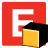

In [ ]:
%%modeller_tool inro.emme.data.matrix.create_matrix --proxy PROXY-259010456-1481729770.01 --out create_matrix
{
    "default_value": 0,
    "matrix_name": "temporary_matrix",
    "matrix_id": "mf",
    "overwrite": false,
    "matrix_description": "A temp matrix for testing"
}

The tool cell now contains a copy of the Modeller tool with the current tool state (input values).

A default variable name is generated that can be changed. For example, in the cell above, <code>tool0</code> can been changed to <code>create_matrix</code> by modifying the name directly in the text box. 

The tool can be run by calling the <code><b>.run</b></code> method (this is the same as clicking the <i>Run</i> button in the tool page).  Execute the cell below to create the temporary matrix:

In [ ]:
create_matrix.run() 

FullMatrix(mf13)

Note that once the cell has been run, the result is displayed in the cell output, here the ID of the full matrix created. You can also check the results in the Logbook. To see the run message in the Notebook, run a new cell with <code>create_matrix</code> only:

<create_matrix-4da9ce40c21311e68046e0cb4e819943.CreateMatrix at 0xf702f98>
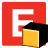

In [ ]:
create_matrix

In order to illustrate another example, use the cells below to automate a transit assignment and analysis:
- Open the <i>Extended transit assignment</i> tool in Modeller, load the saved specification <code>extended_transit_assignment.ems</code>, drag the tool snapshot into the first cell below and change the name to <code>transit_assignment</code>. 
- Open the <i>Matrix results</i> tool in Modeller, and under <i>Actual total waiting times</i>, select the newly created "temporary_matrix". Drag the tool snapshot into the second cell below and change the name to <code>matrix_results</code>.
- Run both tools by executing the third cell below.

<extended_transit_assignment-51c30000c21311e6959be0cb4e819943.ExtendedTransitAssignment at 0xfa3d3c8>
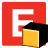

In [ ]:
%%modeller_tool inro.emme.transit_assignment.extended_transit_assignment --proxy PROXY-262394824-1481729770.01 --out transit_assignment
{
    "class_name": "",
    "specification": {
        "aux_transit_time": {
            "perception_factor": 2
        },
        "flow_distribution_at_origins": {
            "fixed_proportions_on_connectors": null,
            "choices_at_origins": "OPTIMAL_STRATEGY"
        },
        "boarding_cost": {
            "at_nodes": {
                "penalty": 2.5,
                "perception_factor": 2
            },
            "on_lines": null
        },
        "flow_distribution_between_lines": {
            "consider_total_impedance": false
        },
        "journey_levels": [],
        "aux_transit_cost": null,
        "in_vehicle_time": {
            "perception_factor": 1
        },
        "od_results": {
            "total_impedance": null
        },
        "performance_settings": {
            "number_of_processors": 1
        },
        "in_vehicle_cost": null,
        "boarding_time": {
            "at_nodes": {
                "penalty": 0,
                "perception_factor": 1
            },
            "on_lines": null
        },
        "modes": [
            "E",
            "b",
            "a",
            "p"
        ],
        "connector_to_connector_path_prohibition": null,
        "flow_distribution_at_regular_nodes_with_aux_transit_choices": {
            "choices_at_regular_nodes": "OPTIMAL_STRATEGY"
        },
        "demand": "mf2",
        "type": "EXTENDED_TRANSIT_ASSIGNMENT",
        "waiting_time": {
            "headway_fraction": 0.5,
            "perception_factor": 2,
            "spread_factor": 1,
            "effective_headways": "hdw"
        }
    },
    "save_strategies": true,
    "add_volumes": false
}

<matrix_results-526ed05ec21311e681c7e0cb4e819943.ExtendedTransitMatrixResults at 0xf710208>
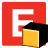

In [ ]:
%%modeller_tool inro.emme.transit_assignment.extended.matrix_results --proxy PROXY-259064328-1481729770.01 --out matrix_results
{
    "class_name": null,
    "num_processors": "max",
    "specification": {
        "actual_total_waiting_times": "mf13",
        "by_mode_subset": null,
        "type": "EXTENDED_TRANSIT_MATRIX_RESULTS"
    }
}

In [ ]:
assign_report = transit_assignment.run()
results_report = matrix_results.run()

Note that the output (report) of each tool has been saved into a variable. If both tools had been run without saving the output report, the report of the last tool executed (<code>matrix_results</code>) would have been displayed in the cell output.

###Tool state
It is possible to change the tool input state, which is analogous to changing the values directly in the tool page.
To get all input names and values, use the <i>&lt;tool&gt;</i><code><b>.get_state()</b></code> statement. For example:

In [ ]:
create_matrix.get_state()

{'default_value': 0.0,
 'matrix_description': u'A temp matrix for testing',
 'matrix_id': u'mf',
 'matrix_name': u'temporary_matrix',
 'overwrite': False}

The output is a Python dictionary in which the key names are based on those found in the tool page (also listed in the Emme Help page of the tool). 

The individual inputs may be accessed and changed using <i>&lt;tool&gt;</i><b>['</b><i>&lt;input_name&gt;</i><b>']</b>.

In [ ]:
create_matrix['matrix_name']

u'temporary_matrix'

In [ ]:
## create_matrix['matrix_id'] = 'mf14'
create_matrix['overwrite'] = True
create_matrix['matrix_name'] = 'temporary_matrix2'
create_matrix['matrix_description'] = 'Another temp matrix'
create_matrix.get_state()

{'default_value': 0.0,
 'matrix_description': u'Another temp matrix',
 'matrix_id': u'mf',
 'matrix_name': u'temporary_matrix2',
 'overwrite': True}

<create_matrix-4da9ce40c21311e68046e0cb4e819943.CreateMatrix at 0xf702f98>
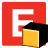

In [ ]:
create_matrix.run()
create_matrix

Using the state-based interface, Modeller tools always run against the primary scenario in Emme Desktop - exactly the same as running tools via the <i>Run</i> button.
The primary scenario can be changed using the following commands:

In [ ]:
# Access the Desktop data explorer 
modeller = inro.modeller.Modeller()
desktop = modeller.desktop
data_explorer = desktop.data_explorer()

In [ ]:
# lookup and change the primary scenario
scenario_1000 = modeller.emmebank.scenario(1000)
data_explorer.replace_primary_scenario(scenario_1000)

Scenario 1000 is protected in the Winnipeg demonstration database. Since we will modify the scenario in the following steps, let's go back to the unprotected scenario 3001:

In [ ]:
data_explorer.replace_primary_scenario(modeller.emmebank.scenario(3001))

###Tool specifications

Some Modeller tools take a specificatioin as input.
- Specifications are Python dictionaries 
- Modeller tool specifications are used to make it easy to represent complex, inter-dependent arguments to tools in one simple, readable format

The <i>Network calculator</i> tool is one of such tools. 
- Open the <i>Network calculator</i> tool in Modeller, and specify:
  - Expression: <code>length\*lanes</code>
  - Result: <code>ul1</code>
  - Link selector: <code>all</code>
- Drop the tool snapshot in the Notebook using the first cell below
- Change the Variable name to <code>network_calc</code>
- Check the tool state by running the second cell below

<network_calculator-bb2610a1c21311e692d9e0cb4e819943.NetworkCalculation at 0x1559f198>
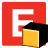

In [ ]:
%%modeller_tool inro.emme.network_calculation.network_calculator --proxy PROXY-358216088-1481729770.01 --out network_calc
{
    "specification": {
        "type": "NETWORK_CALCULATION",
        "selections": {
            "link": "all"
        },
        "expression": "length*lanes",
        "result": "ul1",
        "aggregation": null
    },
    "full_report": false
}

In [ ]:
network_calc.get_state()

{'full_report': False,
 'specification': {u'aggregation': None,
  u'expression': u'length*lanes',
  u'result': u'ul1',
  u'selections': {u'link': u'all'},
  u'type': u'NETWORK_CALCULATION'}}

The tool state dictionary contains an item 'specification', which itself is a dictionary.
The same square-bracket syntax is used to access each of the items inside the specification.
For example:

In [ ]:
network_calc['specification']['expression'] = '2 * lanes'
network_calc['specification']['result'] = 'ul2'

Or, the specification can be set all at once:

In [ ]:
network_calc['specification'] = {
    'type': u'NETWORK_CALCULATION',
    'expression': '2 * lanes', 
    'result': u'ul2',
    'selections': {u'link': u'all'},
    'aggregation': None
    }

In [ ]:
network_calc.run()

{'average': 2.972688,
 'expression_type': 'LINK',
 'maximum': 8.0,
 'maximum_at': {'i_node': 413, 'j_node': 414},
 'minimum': 0.0,
 'minimum_at': {'i_node': 1, 'j_node': 1042},
 'num_attributes_changed': 2599,
 'num_evaluations': 3039,
 'num_results_obtained': 3039,
 'result_type': 'LINK',
 'sum': 9034.0}

In the next example, we will use the network calculator to assign fares to all transit lines.
The fare is 2.5 for the bus mode ('<code>b</code>'), and 3.5 for the express bus ('<code>E</code>'):

In [ ]:
network_calc["specification"]["expression"] = "2.5"
network_calc["specification"]["selections"] = {"transit_line": "mode=b"}
network_calc['specification']['result'] = 'ut1'
report_bus = network_calc.run()

network_calc["specification"]["expression"] = "3.5"
network_calc["specification"]["selections"] = {"transit_line": "mode=E"}
report_exp = network_calc.run()

###Tool call method

A second way to execute tools is to call them with arguments. 
The name of the arguments is the same as in the tool state dictionary, but the syntax is different
(<i>argument</i>=<i>value</i>).
For example:

In [ ]:
create_matrix(matrix_id='mf',
              matrix_name='temporary_matrix3',
              matrix_description='A third temp matrix')

FullMatrix(mf15)

With the call method, it is also possible to specify the scenario as an input.

In the following example, drag the <i>Create extra attribute</i> tool into the Notebook's first cell below with no configuration at all and rename it <code>create_extra</code>. Then, execute the second cell, which calls the tool with the specified arguments and values, including the scenario on which it should be run.

<create_extra_attribute-c2ced1c0c21311e6b5eee0cb4e819943.CreateExtraAttribute at 0x1559fc18>
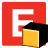

In [ ]:
%%modeller_tool inro.emme.data.extra_attribute.create_extra_attribute --proxy PROXY-358218776-1481729770.01 --out create_extra
{
    "extra_attribute_type": "NODE",
    "extra_attribute_name": "@",
    "overwrite": false,
    "extra_attribute_default_value": 0,
    "extra_attribute_description": null
}

In [ ]:
scen_3000 = modeller.emmebank.scenario(3000) 
create_extra(extra_attribute_type="TRANSIT_LINE",
             extra_attribute_name="@mode_fare",
             overwrite=True,
             scenario=scen_3000)

ExtraAttribute(@mode_fare)

Note that with the call method, a tool doesn't need to be configured and dragged from Modeller to the Notebook. It is possible to access the tool directly from the <code>Modeller</code> object using its namespace. For example:

In [ ]:
copy_scenario = modeller.tool("inro.emme.data.scenario.copy_scenario")
s3002 = copy_scenario(from_scenario=scen_3000,
                      scenario_id=3002,
                      scenario_title="Another copy of scenario 3000",
                      overwrite=True,
                      set_as_primary=True)

##Visualizations and reports
###Logbook

It is possible to:
- Display a record of tool operations as they happen
- Record additional data in the logbook
- Display interactive summaries of logbook information

We will use the <code><b>inro.modeller.logbook_mark</b></code> method to show selected subsections of the Logbook inline:
- Use <code>lb = inro.modeller.logbook_mark()</code> to mark the start of logbook record
- Use <code>display(lb)</code>, or <code>lb</code> at the end of the cell to show the accumulated logbook content

In [ ]:
lb = inro.modeller.logbook_mark()
scen_3001 = modeller.emmebank.scenario(3001) 
create_extra(extra_attribute_type="TRANSIT_LINE",
             extra_attribute_name="@mode_fare",
             overwrite=True,
             scenario=scen_3001)
network_calc["specification"]["expression"] = "2.5"
network_calc["specification"]["selections"] = {"transit_line": "mode=b"}
network_calc['specification']['result'] = '@mode_fare'
report_bus = network_calc.run()

network_calc["specification"]["expression"] = "3.5"
network_calc["specification"]["selections"] = {"transit_line": "mode=E"}
report_exp = network_calc.run()
lb

There are two methods to write to and organize the logbook.
The first one is <code><b>inro.modeller.logbook_write</b><code>, which writes an entry to the logbook:

In [ ]:
lb = inro.modeller.logbook_mark()
inro.modeller.logbook_write("A message in the logbook")
lb

The second method is <code><b>inro.modeller.logbook_trace</b></code>.
It is used in conjunction with the <code><b>with</b></code> statement and indentation to group / nest logbook entries:

In [ ]:
lb = inro.modeller.logbook_mark()
with inro.modeller.logbook_trace("Fare calculation"):
    network_calc["specification"]["expression"] = "2.5"
    network_calc["specification"]["selections"] = {"transit_line": "mode=b"}
    network_calc['specification']['result'] = '@mode_fare'
    report_bus = network_calc.run()

    network_calc["specification"]["expression"] = "3.5"
    network_calc["specification"]["selections"] = {"transit_line": "mode=E"}
    report_exp = network_calc.run()
lb

There are also special commands to show interactive views of the model logbook runtime and operations executed from the Notebook.
- <code><b>%modeller_logbook_rollup</b></code> for a view of the run times of executed commands
- <code><b>%modeller_logbook_tree</b></code> for a view of the hierarchy of logbook nests

In [ ]:
%modeller_logbook_rollup

<IPython.core.display.Javascript object>

In [ ]:
%modeller_logbook_tree

<IPython.core.display.Javascript object>

###Worksheets

Worksheets from Emme Desktop can also be dragged into a Notebook cell using the drag icon located in the top right corner of the worksheet. Dragging and dropping the worksheet drag icon from a worksheet into an empty code cell in the Notebook saves the worksheet contents and a representative image into the Notebook.

In Emme Desktop, open the <i>Winnipeg General Worksheet</i>, and drag the worksheet into the cell below:

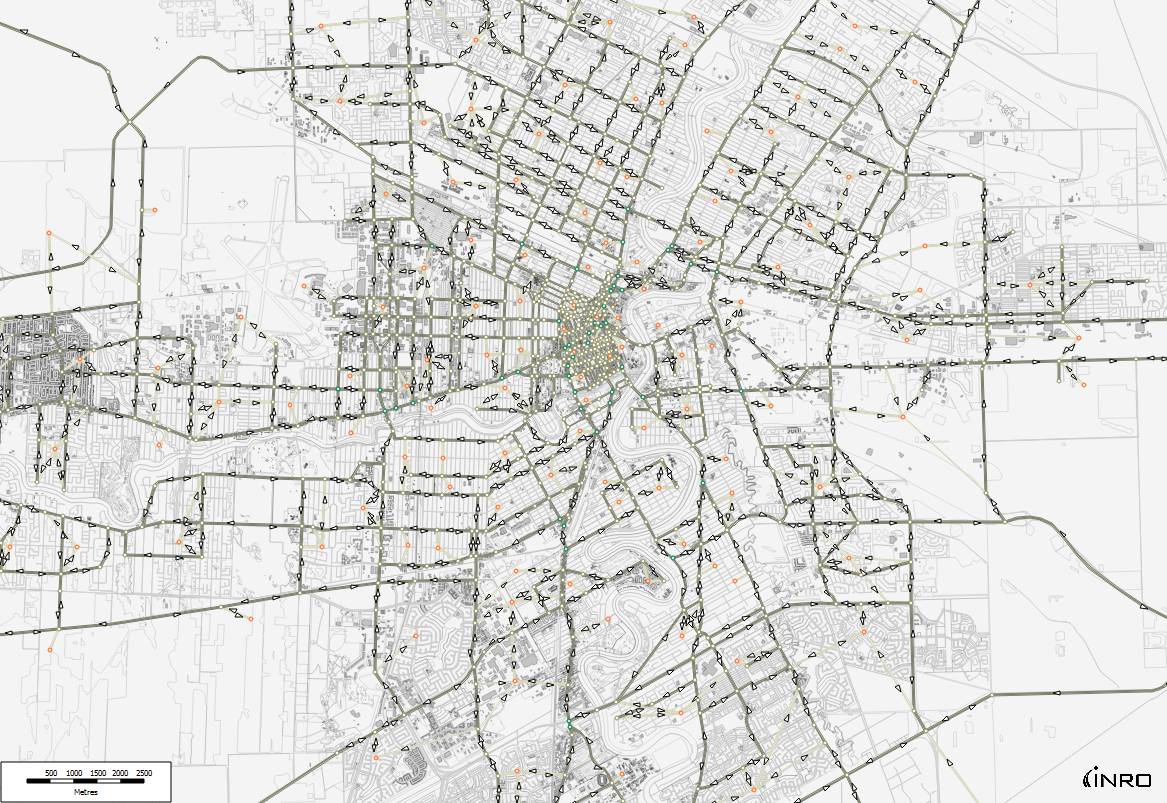

In [ ]:
%%modeller_worksheet "[Modeller-API-Guide-1461184871724]-Winnipeg_general.emw" --view "[625803.0, 5518420.0, 640645.0, 5535570.0]" --out worksheet0 --proxy PROXY-333678184-1481729770.01 --size "[682.5, 511.875]"
D2461A6A-1F51-4A2C-87AC-6C3C49AA9DF7 07B0F5AD-A2A7-4B4E-B4A9-06EB441586D6 2 4 0
# Emme worksheet generated on Wed Apr 20 16:41:11 2016
# File: C:/Emme/Projects/WI014B~1/Scripts/.modeller/[Modeller-API-Guide-1461184871724]-Winnipeg_general.emw
#
# String Name: name of worksheet (tr,subst)
Name : PlotName
Name = Winnipeg General Worksheet
# Text Description: description of worksheet (tr,subst)
Description = <h2 style="clear: both">Winnipeg General Worksheet</h2>\
<p>This worksheet can be used to display attributes for several\
types of network element. Each tab corresponds to one type of\
network element. For each layer, one or several filters allow\
restricting the elements analyzed.</p>\
This worksheet is a modified version of the <i>General worksheet</i>\
common to all projects. \
It contains the following additional layers:\
<ul>\
<li><b><font color= "navy">Buildings</font></b>:\
<i>GIS vector</i> layer showing buildings from winnipeg land use data table.</li>\
<li><b><font color= "navy">Roads</font></b>:\
<i>GIS vector</i> layer showing all the Winnipeg roads.</li>\
<li><b><font color= "navy">Street names</font></b>:\
<i>Link text</i> layer to display street names contained in wpglinks data table.</li>\
<li><b><font color= "navy">Distance legend</font></b>:\
<i>Legend</i> layer to display a distance item in the lower left corner of the map.</li>\
</ul>\
</p>\
<h4>Desire lines</h4>\
To display desire lines from/to selected zone(s):\
<ul>\
<li>Enter the matrix identifier or name in the <b><font color=\
"navy">Matrix value</font></b> field.</li>\
<li>Select the pointer tool and double-click on the desired zone\
(it may help to change the filter in the <b><font color=\
"navy">Nodes</font></b> layer to <tt><b>isZone</b></tt> in order to\
restrict the nodes that can be picked with the pointer tool). Use\
Ctrl+double-click to add nodes to the list. Selected zones are\
displayed with the <b><font color="navy">Marked node(s)</font></b>\
style.</li>\
<li>Use one of the predefined choices in <b><font color=\
"navy">Direction</font></b> to draw arrows <b>from</b> or\
<b>to</b> the selected zone(s).</li>\
<li>The arrow width is adjusted automatically when changing the\
matrix value. Use <b><font color="navy">Scale</font></b> to\
increase/reduce the arrow width.</li>\
<li>Arrows are colored using the <b><font color=\
"navy">Arrows</font></b> style and the <b><font color=\
"navy">Index</font></b> expression.</li>\
<li>Use <b><font color="navy">Intrazonals</font></b> to display the\
intrazonal values as circles over the corresponding selected\
zones.</li>\
<li>Use <b><font color="navy">Numeric value</font></b> to display\
the matrix value numerically. A value is displayed only if the\
arrow is wide enough to accommodate the text size specified.</li>\
</ul>\
<h4>Nodes</h4>\
This layer can be used to display node circles,\
node boxes with or without node box text,\
and node attributes in the form of symbols.\
<p><em>Node boxes</em></p>\
<ul>\
<li>Select <b><font color="navy">Node box</font></b> to display a\
small square at node location. Node boxes are colored using the\
<b><font color="navy">Node style</font></b>: index 0 for\
regular nodes, index 1 for centroids and index 2 for\
intersections.</li>\
<li>To restrict the number of nodes displayed, use <b><font color=\
"navy">Node filter</font></b>.</li>\
<li>To display values in the node boxes, enter up to 6 numeric or\
text node values (separated by commas) in the <b><font color=\
"navy">Node box text</font></b> field. For example, use\
<tt><b>id</b></tt> to display the node identifier. The size of the\
box is adjusted automatically.</li>\
<li>Specify the text size and the desired number of decimals.</li>\
<li>By default, node boxes are centered on the node coordinates. To\
move the node boxes to the right/left use <b><font color=\
"navy">H.offset</font></b>; to move up/down, use <b><font color=\
"navy">V.offset</font></b>.</li>\
</ul>\
<p><em>Node symbols</em></p>\
<ul>\
<li>To display node values in the form of symbols at nodes, enter\
up to 12 numeric node values (separated by commas) in the\
<b><font color="navy">Symbol value</font></b> field, or choose one\
of the predefined expressions at the top of the popup list.</li>\
<li>The initial symbol is <em>Circle</em> allowing the display of\
several attributes as a pie chart. Use <b><font color=\
"navy">Symbol</font></b> to choose another symbol.</li>\
<li>The scale is adjusted automatically when changing the symbol\
value expression. Use <b><font color="navy">Scale</font></b> to\
reduce/increase the size of the symbol.</li>\
<li>By default, the scale factor is applied to the diameter of the symbol.\
To apply the scale factor to the area, select <b><font color="navy">Prop.to area</font></b>.</li>\
<li>Symbols are colored using the <b><font color="navy">Symbol style</font></b>\
and the <b><font color="navy">Symbol index</font></b> expression.\
When displaying more than one value, use the empty expression\
so that each value is displayed with a different style index.</li>\
</ul>\
<h4>Sum of segment values</h4>\
This layer can be used to display transit values summed over links\
and/or nodes.\
<ul>\
<li>Turn on the layer visibility icon. By default, the bars are\
proportional to the number of transit lines using each link.</li>\
<li>To restrict the number of lines displayed, use <b><font color=\
"navy">Line filter</font></b>. The initial filter is <em>all\
lines</em>.</li>\
</ul>\
<p><em>Bars on links</em></p>\
<ul>\
<li>To define the part of the network that is of interest, use\
<b><font color="navy">Link filter</font></b>. Only the part of the\
filtered lines that run on the specified sub-network will be\
used.</li>\
<li>To display segment values in the form of bars, enter up to 12\
numeric segment values (separated by commas) in the <b><font color=\
"navy">Seg. value on links</font></b> field or choose one of the\
predefined expressions at the top of the popup list. The value will\
be summed for all lines filtered over all links filtered.</li>\
</ul>\
<p><em>Symbols at nodes</em></p>\
<ul>\
<li>To restrict the number of nodes displayed, use <b><font color=\
"navy">Node filter</font></b>.</li>\
<li>To display segment values in the form of symbols at nodes,\
enter up to 12 numeric segment values (separated by commas) in the\
<b><font color="navy">Seg. value at nodes</font></b> field or\
choose one of the predefined expressions at the top of the popup\
list. The value will be summed for all lines filtered over all\
nodes filtered.</li>\
<li>The initial symbol is <em>Circle</em> allowing the display of\
several attributes as a pie chart. Use <b><font color=\
"navy">Symbol</font></b> to choose another symbol.</li>\
</ul>\
<p><em>Text values</em></p>\
<ul>\
<li>To display the numeric values inside the bars, select\
<b><font color="navy">Show bar numeric values</font></b>.</li>\
<li>To display the numeric values over the symbols, select\
<b><font color="navy">Show symbol numeric values</font></b>.</li>\
<li>Specify the text size and the desired number of decimals.</li>\
</ul>\
<h4>Transit lines</h4>\
<ul>\
<li>Turn on the layer visibility icon. Initially all lines are\
shown with a segment offset of 1.</li>\
<li>To restrict the number of lines displayed, use <b><font color=\
"navy">Line filter</font></b>.</li>\
<li>To define the part of the network that is of interest, use\
<b><font color="navy">Link filter</font></b>. The initial filter is\
the empty expression, that is, <em>all links</em>. Only the part of\
the filtered lines that run on the specified sub-network will be\
drawn.</li>\
<li>Lines are displayed using the pen properties of the\
<b><font color="navy">Lines</font></b> style and <b><font color=\
"navy">Line index</font></b> expression. The initial index\
expression is set to <tt><b>lindex%10</b></tt>, which displays the\
lines with a rotation of 10 colors. To change the pen width, click\
the style tool and select <b><font color="navy">All indices -&gt;\
Pen width</font></b></li>\
<li>Use <b><font color="navy">Link offset</font></b> to change the\
number of pixels between the link base and the first transit\
segment.</li>\
<li>Use <b><font color="navy">Seg. offset</font></b> to change the\
number of pixels between line segments.</li>\
</ul>\
<p><em>Stops</em></p>\
<ul>\
<li>Use <b><font color="navy">Line ends</font></b> to identify the\
first and last stops with two special symbols.</li>\
<li>Use <b><font color="navy">Transit stops</font></b> to identify\
all the stops (boarding and/or alighting allowed) along the\
itinerary.</li>\
<li>Use <b><font color="navy">Stop size</font></b> to adjust the\
size of the transit stops and line ends symbols.</li>\
</ul>\
<p><em>Line names and segment values</em></p>\
<ul>\
<li>Choose <b><font color="navy">Line names</font></b> to display\
the line name on each segment. Line name is displayed if there is\
enough space on the link.</li>\
<li>Use <b><font color="navy">Segment value</font></b> to display\
up to 2 transit segment values. The first value is displayed on the segment,\
the second value is displayed on the I-node of the segment.\
<li>Use <b><font color="navy">Text size</font></b> to control the\
size and <b><font color="navy">Text offset</font></b> to control\
the position of the text. An offset of 0 centers the text on the\
line, while positive and negative values display it on opposite\
sides of the line.</li>\
</ul>\
<h4>Turns at intersections</h4>\
By default, the turn value expression follows the link predefined\
expression selected in the <b><font color="navy">Links</font></b>\
layer.\
<ul>\
<li>To restrict the number of intersection nodes displayed, use\
<b><font color="navy">Intersection filter</font></b>. The initial\
filter is <em>intersection nodes connected to filtered\
links</em>.</li>\
<li>To prevent the display of turn values when using one of the\
link predefined expressions, use <em>no nodes</em> as filter\
expression or turn off the layer visibility icon.</li>\
<li>To overwrite temporarily the default behavior, enter a new\
expression in the <b><font color="navy">Turn value</font></b> field\
(default behavior is reset when another predefined expression is\
selected in the <b><font color="navy">Links</font></b> layer).</li>\
<li>Use <b><font color="navy">Scale</font></b> to increase/reduce\
the turn bars width. Scale for link value(s), if any, will follow\
automatically.</li>\
<li>Bars are colored using the <b><font color=\
"navy">Turns</font></b> style and the <b><font color="navy">Turn\
index</font></b> expression. By default, all bars are colored using\
index 0. Predefined expressions at the top of the index popup list\
allow coloring bars according to turn penalty function and turn\
angles.</li>\
<li>To display the turn numeric value inside the bars, select\
<b><font color="navy">Value at beginning of turn</font></b> and/or\
<b><font color="navy">Value at end of turn</font></b>. If the\
linear part of the turns is 0, numeric values are displayed outside\
the intersection circle. If the linear part is greater than 0,\
numeric values are displayed inside the linear part, if large\
enough (the linear part is expressed in percentage).</li>\
<li>Specify the desired number of decimals in the <b><font color=\
"navy">Decimals</font></b> field.</li>\
<li>By default, intersection circles are shown and sized\
automatically to avoid overlap with neighboring nodes. Use\
the <b><font color="navy">Diameter</font></b> field to change the\
maximum size (in pixels) of the intersection circles.</li>\
<li>To draw an arrow at the beginning and the end of each turn,\
use <b><font color="navy">Turn arrows</font></b>.\
The size of the arrows is controlled using <b><font color="navy">Arrow \
width</font></b> and <b><font color="navy">Arrow height</font></b>.</li>\
</ul>\
<h4>Links</h4>\
<ul>\
<li>To restrict the number of links displayed, use <b><font color= "navy">Link filter</font></b>.\
The initial filter is <em>all links</em>.\
The link filter in this layer is the <em>master</em>\
one, that is, other layers can refer to this filter using\
<tt><b>isActive</b></tt>. For example, in a node layer,\
<tt><b>isActive</b></tt> refers to the nodes connected to the\
filtered links.</li>\
</ul>\
<p><em>Base links</em></p>\
<ul>\
<li>Base links are displayed using <b><font color=\
"navy">Links</font></b> style and the <b><font color="navy">Link\
index</font></b> expression. The initial index expression is set to\
<tt><b>isConnector</b></tt>, which yields 0 for regular links and 1\
for connectors.</li>\
<li>Use <b><font color="navy">Link arrows</font></b>\
to draw an arrow showing the direction of the link.\
The size of the arrow is proportional to the link offset.</li>\
</ul>\
<p><em>Bars on links</em></p>\
<ul>\
<li>To display link values in the form of bars, enter up to 12\
numeric link values (separated by commas) in the <b><font color=\
"navy">Bar value</font></b> field.</li>\
<li>The first value in a multivalue expression corresponds to the\
innermost layer, the last to the outermost.</li>\
<li>Bars are colored using the <b><font color=\
"navy">Bars</font></b> style and the <b><font color="navy">Bar\
index</font></b> expression. By default (empty expression), each\
bar is colored according to the value index.</li>\
<li>To display the numeric value inside the bars, select\
<b><font color="navy">Show bar value</font></b>. Specify the\
desired number of decimals in the <b><font color=\
"navy">Decimals</font></b> field.</li>\
<li>To display auto assignment results, use one of the predefined\
expressions at the top of the <b><font color="navy">Bar\
value</font></b> popup list.</li>\
</ul>\
<p><em>Text on links</em></p>\
<p>To display link values in the form of text, enter up to 12 text\
link values (separated by commas) in the <b><font color="navy">Text\
value</font></b> field. Values are displayed on top of bars. For\
example, use <tt><b>modes</b></tt> to display the string showing\
all the link modes.</p>\
<p>Worksheet file: <code>Winnipeg_general.emw</code></p>\
<hr>\
<small>Copyright &copy; 2016, INRO. All rights reserved.</small>
# String Caption: caption that appears on window bar (tr,subst)
Caption = %<Name>%
# String Active: name of currently active layer
Active : ActiveLayer
Active = Nodes
# Bool AllowReordering: Layers reordering of this configuration is permitted
AllowReordering = 0
# Float TransformationMatrix: coordinate transformation matrix
TransformationMatrix : (0x200) /TransformationMatrix!/$WorksheetLoaded
TransformationMatrix[] = 0
TransformationMatrix[] = 0
TransformationMatrix[] = 1
TransformationMatrix[] = 1
TransformationMatrix[] = 0
TransformationMatrix[] = 0
TransformationMatrix[] = 0
TransformationMatrix[] = 0

[Background]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Background color
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : ShowBackColor
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowBackColor
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag = 1
# Bool IFlag: allow interactive input
IFlag = 0
# Style Style: style for filling background when no wallpaper is used
Style : (0x200) /BackgroundColor!/$WorksheetLoaded
Style = 0x00000000 0x01f4f4f4 0x00000000 0x00000000

[Inclusion]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Background layer(s)
# Text Description: user definable layer description (tr,subst)
Description = Includes user defined layers (in application mode,\
control shown only if a file is specified and control is substituted)
# Flags Flags: bit pattern containing layer flags
Flags = 0xb800000
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : ShowBackInclusion
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowBackInclusion
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag = 1
# Bool IFlag: allow interactive input
IFlag = 0
# Bool TFlag: provide tips
TFlag = 1
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag = 0
# Bool EnableObjects: enable included objects
EnableObjects = 1
# Bool SubstituteControl: display control of first visible included layer instead of inclusion layer's control
SubstituteControl = 1
# Bool AutoHideControl: hide unsubstituted layer control
AutoHideControl = 1
# String ConfigurationFile: file containing configuration to include (subst)
ConfigurationFile : (0x200) /UserBack!/$WorksheetLoaded
ConfigurationFile[] = 
ConfigurationFile[] = 
ConfigurationFile[] = %<$ProjectPath>%/Media/roads.eml
ConfigurationFile[] = %<$ProjectPath>%/Media/buildings.eml
ConfigurationFile[] = %<$ProjectPath>%/Media/land_and_waterway.eml

[GIS vector]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Buildings
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : SFlag/
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /SFlag
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag = 1
# Bool BFlag: include bounding box in full view
BFlag = 0
# String DatasetTextEncoding: encoding used for text in the dataset table(s)
DatasetTextEncoding = UTF-8
# Expression StyleIndex: shape style index (tr,string)
StyleIndex = BUILDING!=""
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks[] = 0.000000000000000;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks = 1
# String BreakMethod: break compute method
BreakMethod = Sorted
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks = 1
# Style Style: fill / outline properties for shapes
Style[] = 0x20000000 0x01000000 0x03ffffff 0x019995ac
Style[] = 0x20000000 0x01ffffff 0x03000000 0x01ffc5ac
# String VectorFile: file specification for file to display
VectorFile = %<$ProjectPath>%/data_tables.db
# String Dataset: Dataset used from data source for drawing
Dataset = 1 - winnipeg land use

[GIS vector]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Roads
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : ShowRoadShapefile
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowRoadShapefile
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag : /ShowRoadShapefile
LFlag = 1
# Bool BFlag: include bounding box in full view
BFlag = 0
# Expression StyleIndex: shape style index (tr,string)
StyleIndex[] = 5
StyleIndex[] = 5
StyleIndex[] = if(TYPE=="Hwy",4,5)
StyleIndex[] = which((TYPE),"Rd","Prom","Blvd","Hwy","Ave","Dr","St")
# Style Style: fill / outline properties for shapes
Style[] = 0x21dcb5b5 0x01dcb5b5 0x00000000 0x00000000
Style[] = 0x2199b3cc 0x0199b3cc 0x00000000 0x00000000
Style[] = 0x21a7cc95 0x01a7cc95 0x00000000 0x00000000
Style[] = 0x21ffe798 0x01ffe798 0x00000000 0x00000000
Style[] = 0x21ff8c57 0x01ff8c57 0x00000000 0x00000000
Style[] = 0x21d1d1d1 0x01d1d1d1 0x00000000 0x00000000
Style[] = 0x21ebe6dc 0x01ebe6dc 0x00000000 0x00000000
# String VectorFile: file specification for file to display
VectorFile = %<$ProjectPath>%/Media/WinnipegRoads.shp
# String DefaultDirectory: default directory for files (subst)
DefaultDirectory = %<$ProjectPath>%/Media
# String Dataset: Dataset used from data source for drawing
Dataset = 1 - WinnipegRoads

[Link value]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = dummy layer
# Text Description: user definable layer description (tr,subst)
Description : (0x800)
Description = Used to position segment link value with incremental offset
# Flags Flags: bit pattern containing layer flags
Flags = 0xbf00000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : ShowLinkDomain
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowLinkDomain
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag = 0
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag = 0
# Bool DrawLinkBars: draw link bars with proportional width
DrawLinkBars : DrawLinkBars
DrawLinkBars = 1
# Bool NumericalValues: display link values numerically on links
NumericalValues : NumericalValues
NumericalValues = 0
# Bool ValuesOnTop: put total value outside bar, instead of value(s) within bar
ValuesOnTop : ValuesOnTop
ValuesOnTop = 0
# Bool AutoFlip: flip link text to read from left to right
AutoFlip = 0
# Bool AutoScaleButton: display auto scale button in scale field
AutoScaleButton = 0
# Integer Decimals: number of decimals in numeric values
Decimals : LinkDecimals
Decimals = 0
# Float Offset: link offset (pixels)
Offset : Offset
Offset = 1
# Float Scale: value scale for proportional bars (units/pixel)
Scale : (0x4000) /BarScale
Scale = 1
# Style Style: style for link value outline, fill and text properties
Style = 0x00000000 0x00ffffff 0xe0000000 0x0000002e
# Float TextSize: text size for link values
TextSize : TextSize
TextSize = 10
# Expression LinkValue: expression for link value (tr,link,max. 12 values)
LinkValue : (0x140) /LinkValue
LinkValue[] = [no value] 0
LinkValue[] = [no value] 0
LinkValue[] = [auto volume] volau
LinkValue[] = [additional volume] volad
LinkValue[] = [auto volume and addl. volume] volau,volad
LinkValue[] = [addl. volume and auto volume] volad,volau
LinkValue[] = [sum of auto and addl. volume] volau+volad
LinkValue[] = [difference auto minus addl. volume] volau-volad
LinkValue[] = [auxiliary transit volume] volax
LinkValue[] = 
# Filter LinkFilter: expression for link filtering [,link iterator] (tr,link,string,max. 2 values)
LinkFilter : LinkFilter
LinkFilter = [all links] 1

[Segment link value]
# Text Description: user definable layer description (tr,subst)
Description = Displays transit segment values above regular link values.\
WARNING: this layer MUST be just above the dummy link value layer.
# Flags Flags: bit pattern containing layer flags
Flags = 0xbfb0000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : ShowTransitSegmentDomain
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /ShowTransitSegmentDomain
MFlag = 0
# Bool LFlag: include layer in the legend window
LFlag : /ShowTransitSegmentDomain
LFlag = 0
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag : /ShowTransitSegmentDomain
BFlag = 0
# Bool NumericalValues: display link values numerically on links
NumericalValues : ShowSegmentBarValue
NumericalValues = 0
# Bool ValuesOnTop: put total value outside bar, instead of value(s) within bar
ValuesOnTop = 0
# Bool AllowOverhangingText: display texts that exceed the bar width or available space between vertices
AllowOverhangingText : AllowOverhang
AllowOverhangingText = 0
# Bool IncrementalOffset: add final offset of previous link or segment value layer
IncrementalOffset = 1
# Integer Decimals: number of decimals in numeric values
Decimals : SegmentDecimals
Decimals = 0
# Float Scale: value scale for proportional bars (units/pixel)
Scale : (0x4000) SegmentBarScale
Scale = 1
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : SegmentBarBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : SegmentBarUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : SegmentBarBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : SegmentBarBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : SegmentBarComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : SegmentBarDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : SegmentBarDiscreteBreaks
DiscreteBreaks = 0
# Style Style: style for link value outline, fill and text properties
Style : SegmentBarStyle!
Style[] = 0x20009898 0x0100cccc 0x00000000 0x00679080
Style[] = 0x20b43c00 0x01ff5500 0x00000000 0x00679080
Style[] = 0x207bb800 0x01aaff00 0x00000000 0x00679080
Style[] = 0x206e7781 0x019daab9 0x00000000 0x00679080
Style[] = 0x20c82527 0x01ff2f32 0x00000000 0x00679081
Style[] = 0x20008000 0x0100b800 0x00000000 0x00679080
Style[] = 0x20003ab0 0x010055ff 0x00000000 0x00679080
Style[] = 0x20be7206 0x01ffa10a 0x00000000 0x00679081
Style[] = 0x207f27b5 0x01b337ff 0x00000000 0x00679080
Style[] = 0x20afa702 0x01e6ff05 0x00000000 0x00679080
Style[] = 0x20744a2a 0x019f673a 0x00000000 0x00679081
Style[] = 0x20cf78c9 0x01ff94f7 0x00000000 0x00679081
# Float TextSize: text size for link values
TextSize : SegmentTextSize
TextSize = 6
# Filter LinkFilter: expression for link filtering [,link iterator] (tr,link,string,max. 2 values)
LinkFilter : TransitLinkFilter
LinkFilter = 
# Expression StyleIndex: expression for link style index (tr,link,string)
StyleIndex : SegmentBarStyleIndex
StyleIndex = 
# Expression SegmentValue: expression for transit segment value (tr,seg.,max. 12 values)
SegmentValue : SegmentLinkValue
SegmentValue[] = [number of transit lines] 1
SegmentValue[] = [no value] 0
SegmentValue[] = [number of transit lines] 1
SegmentValue[] = [transit vehicles per hour] 60/hdw
SegmentValue[] = [auto equivalents per hour] vauteq*60/hdw
SegmentValue[] = [seated capacity per hour] caps
SegmentValue[] = [total capacity per hour] capt
SegmentValue[] = [seated and standing capacity per hour] caps,capt-caps
SegmentValue[] = [transit segment volume] voltr
SegmentValue[] = [passenger hours] voltr*timtr/60
SegmentValue[] = [vehicle hours] timtr/hdw
SegmentValue[] = [operating cost] (vcohr*timtr+vcolu*length*60)/hdw
SegmentValue[] = [energy consumption] (venhr*timtr+venlu*length*60)/hdw
SegmentValue[] = [segment user data 1] us1
SegmentValue[] = [segment user data 2] us2
SegmentValue[] = [segment user data 3] us3
# Filter LineFilter: expression for transit line filtering (tr,line,string,max. 2 values)
LineFilter : TransitFilter
LineFilter = [all lines] 1

[Link value]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Link bar
# Text Description: user definable layer description (tr,subst)
Description : (0x800)
Description = Plot the specified value for the filtered links. \
The value, the link selection and the style index are defined by expressions. \
The offset, the scale and the style index expression are grouped with the corresponding elements in the 'Intersection' layer. \
The link selection is grouped with the base network link selection and is the 'Active' selection. 
# Flags Flags: bit pattern containing layer flags
Flags = 0x9e00000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : ShowLinkDomain
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowLinkDomain
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag : /ShowLinkDomain
LFlag = 1
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag : /ShowLinkDomain
BFlag = 1
# Bool DrawLinkBars: draw link bars with proportional width
DrawLinkBars : DrawLinkBars
DrawLinkBars = 1
# Bool NumericalValues: display link values numerically on links
NumericalValues : NumericalValues
NumericalValues = 0
# Bool ValuesOnTop: put total value outside bar, instead of value(s) within bar
ValuesOnTop : ValuesOnTop
ValuesOnTop = 0
# Bool AllowOverhangingText: display texts that exceed the bar width or available space between vertices
AllowOverhangingText : AllowOverhang
AllowOverhangingText = 0
# Integer Decimals: number of decimals in numeric values
Decimals : LinkDecimals
Decimals = 0
# Float Offset: link offset (pixels)
Offset : Offset
Offset = 1
# Float Scale: value scale for proportional bars (units/pixel)
Scale : (0x4000) BarScale
Scale = 1
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : LinkBarValueBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : LinkBarValueUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : LinkBarValueBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : LinkBarValueBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : LinkBarValueComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : LinkBarValueDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : LinkBarValueDiscreteBreaks
DiscreteBreaks = 0
# Style Style: style for link value outline, fill and text properties
Style : MultiBars!
Style[] = 0x20c82527 0x01ff2f32 0x00000000 0x00679081
Style[] = 0x20008000 0x0100b800 0x00000000 0x00679080
Style[] = 0x20003ab0 0x010055ff 0x00000000 0x00679080
Style[] = 0x20be7206 0x01ffa10a 0x00000000 0x00679081
Style[] = 0x207f27b5 0x01b337ff 0x00000000 0x00679080
Style[] = 0x20afa702 0x01e6ff05 0x00000000 0x00679080
Style[] = 0x20744a2a 0x019f673a 0x00000000 0x00679081
Style[] = 0x20cf78c9 0x01ff94f7 0x00000000 0x00679081
Style[] = 0x20009898 0x0100cccc 0x00000000 0x00679080
Style[] = 0x20b43c00 0x01ff5500 0x00000000 0x00679080
Style[] = 0x207bb800 0x01aaff00 0x00000000 0x00679080
Style[] = 0x206e7781 0x019daab9 0x00000000 0x00679080
# Float TextSize: text size for link values
TextSize : TextSize
TextSize = 10
# Expression LinkValue: expression for link value (tr,link,max. 12 values)
LinkValue : (0x140) @LinkValue/LinkValue/@LinkValue
LinkValue[] = [no value] 0
LinkValue[] = [no value] 0
LinkValue[] = [auto volume] volau
LinkValue[] = [additional volume] volad
LinkValue[] = [auto volume and addl. volume] volau,volad
LinkValue[] = [addl. volume and auto volume] volad,volau
LinkValue[] = [sum of auto and addl. volume] volau+volad
LinkValue[] = [difference auto minus addl. volume] volau-volad
LinkValue[] = [auxiliary transit volume] volax
LinkValue[] = 
# Filter LinkFilter: expression for link filtering [,link iterator] (tr,link,string,max. 2 values)
LinkFilter : LinkFilter
LinkFilter = [all links] 1
# Expression StyleIndex: expression for link style index (tr,link,string)
StyleIndex : LinkBarStyleIndex
StyleIndex = 

[Link base]
# Flags Flags: bit pattern containing layer flags
Flags = 0x8200000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : ShowLinkDomain
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowLinkDomain
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag : /ShowLinkDomain
LFlag = 1
# Bool IFlag: allow interactive input
IFlag = 1
# Bool XFlag: intercept all graphic input
XFlag = 0
# Bool TFlag: provide tips
TFlag = 1
# Bool AFlag: set active flag of filtered elements
AFlag = 1
# Bool BFlag: include bounding box in full view
BFlag : /ShowLinkDomain
BFlag = 1
# Bool SendMarkingSignals: send out signals when links are marked
SendMarkingSignals = 1
# Bool ReceiveMarkingSignals: mark links when external marking signals received
ReceiveMarkingSignals = 1
# Bool ShowStatusMessage: show identifier of focused link on status bar
ShowStatusMessage = 1
# Bool MultiMarking: enable multi-marking when left mouse button is pressed
MultiMarking = 1
# Float Offset: link thickness (pixels)
Offset : Offset
Offset = 1
# Filter LinkFilter: expression for link filtering [,link iterator] (tr,link,string,max. 2 values)
LinkFilter : LinkFilter
LinkFilter = [all links] 1
# Integer ArrowWidth: width of the arrows (in pixels)
ArrowWidth : ArrowWidth
ArrowWidth = 4
# Integer ArrowHeight: height of the arrows (in pixels)
ArrowHeight : ArrowHeight
ArrowHeight = 8
# Bool LinkArrows: draw an arrow showing the direction of the link
LinkArrows : LinkArrows
LinkArrows = 1
# Integer HighligthedVertex: highlight vertex (-1 == none)
HighligthedVertex : HighligthedVertex
HighligthedVertex = 0
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : LinkBaseBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : LinkBaseUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : LinkBaseBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : LinkBaseBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : LinkBaseComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : LinkBaseDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : LinkBaseDiscreteBreaks
DiscreteBreaks = 0
# Style Style: style for link outline and fill properties
Style : Basenet!
Style[] = 0x207b7f6b 0x01d6d4b8 0x00000000 0x00000000
Style[] = 0x20d6d4b8 0x01ffffff 0x00000000 0x00000000
Style[] = 0x209c4d3d 0x01ff6b4c 0x00000000 0x00000000
Style[] = 0x209c6e3d 0x01ffa94c 0x00000000 0x00000000
Style[] = 0x209c803d 0x01ffcb4c 0x00000000 0x00000000
Style[] = 0x20646464 0x01969696 0x00000000 0x00000000
Style[] = 0x2096ab59 0x01c3de73 0x00000000 0x00000000
# Expression StyleIndex: expression for link style index (tr,link,string)
StyleIndex : LinkBaseStyleIndex
StyleIndex[] = [0: regular links; 1: connectors] isConnector
StyleIndex[] = [0: regular links; 1: connectors] isConnector
StyleIndex[] = [0: regular; 1: connector; 2: one-way] which(1,isConnector,isOneWay)

[Parameter conversion]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = ArrowWidth
# Flags Flags: bit pattern containing layer flags
Flags = 0xbfb0000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : SFlag/
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /SFlag
MFlag = 0
# Float FA: floating point parameter FA
FA : Offset
FA = 1
# Expression Expression: expression for parameter conversion (tr,string,max. 12 values)
Expression = if(FA<2,4,FA+2)
# Float FR: floating point result
FR = 4
# Integer IR: integer result
IR : ArrowWidth/
IR = 4
# String SR: string result
SR = 4.000000000000000
# Box BR: box result
BR = 4;0;0;0

[Parameter conversion]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = ArrowHeight
# Flags Flags: bit pattern containing layer flags
Flags = 0xbfb0000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : SFlag/
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /SFlag
MFlag = 0
# Integer IA: integer parameter IA
IA : ArrowWidth
IA = 4
# Expression Expression: expression for parameter conversion (tr,string,max. 12 values)
Expression = IA*2
# Float FR: floating point result
FR = 8
# Integer IR: integer result
IR : ArrowHeight/
IR = 8
# String SR: string result
SR = 8.000000000000000
# Box BR: box result
BR = 8;0;0;0

[Parameter conversion]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Node circle diameter
# Text Description: user definable layer description (tr,subst)
Description = SR (node symbol symbol value)=FA(base link offset)*2+2.
# Flags Flags: bit pattern containing layer flags
Flags = 0xbfb0000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : SFlag/
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /SFlag
MFlag = 0
# Float FA: floating point parameter FA
FA : /Offset
FA = 1
# Integer IA: integer parameter IA
IA : /NodeCircles
IA = 1
# Expression Expression: expression for parameter conversion (tr,string,max. 12 values)
Expression = if(IA,FA*2+2,0)
# Float FR: floating point result
FR : FR
FR = 4
# Integer IR: integer result
IR = 4
# String SR: string result
SR : NodeCircleDiameter/
SR = 4.000000000000000
# Box BR: box result
BR = 4;0;0;0

[Node symbol]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Node circles
# Flags Flags: bit pattern containing layer flags
Flags = 0x9f00000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : /ShowNodeDomain
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowNodeDomain
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag = 0
# Bool TFlag: provide tips
TFlag = 0
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag : /ShowNodeDomain
BFlag = 1
# Float Scale: value scale for shapes (units/pixel)
Scale = 1
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : NodeBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : NodeUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : NodeBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : NodeBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : NodeComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : NodeDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : NodeDiscreteBreaks
DiscreteBreaks = 0
# Style Style: style for symbol outline, fill and text properties
Style : Nodes!
Style[] = 0x2088896d 0x01fffddb 0x00000000 0x00000000
Style[] = 0x20ff5c0a 0x01ffe4d7 0x00000000 0x00000000
Style[] = 0x2000665f 0x01bef9be 0x00000000 0x00000000
Style[] = 0x2000647f 0x01afdbdc 0x00000000 0x00000000
Style[] = 0x207e5f08 0x01b5a57c 0x00000000 0x00000000
# Expression SymbolPosition: symbol position x, y [,angle [,shapeval]] (tr,node,max. 4 values)
SymbolPosition : (0x10)
SymbolPosition = xi,yi
# Expression Value: expression for up to 12 values (tr,node,string,max. 12 values)
Value : /NodeCircleDiameter
Value = 4.000000000000000
# Filter Filter: expression for element filtering [, iterator] (tr,node,string,max. 2 values)
Filter : NodeFilter
Filter[] = [nodes connected to filtered links] isActive
Filter[] = [nodes connected to filtered links] isActive
# Expression StyleIndex: expression for style index (tr,node,string)
StyleIndex : NodeStyleIndex
StyleIndex[] = [1: centroid; 2: intersection; 0: regular] which(1,isZone,isIntersection)
StyleIndex[] = [1: centroid; 2: intersection; 0: regular] which(1,isZone,isIntersection)

[Link text]
# Flags Flags: bit pattern containing layer flags
Flags = 0x9e00000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : ShowLinkDomain
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowLinkDomain
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag : /ShowLinkDomain
LFlag = 1
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag : /ShowLinkDomain
BFlag = 1
# Bool DisplayText: display texts on links
DisplayText : DisplayText
DisplayText = 1
# Bool AutoFlip: flip link text to read from left to right
AutoFlip : AutoFlip
AutoFlip = 1
# Bool AllowOverhang: display text that exceeds the space available between vertices
AllowOverhang : AllowOverhang
AllowOverhang = 0
# Bool IncrementalOffset: add final offset of previous link or segment value layer
IncrementalOffset = 1
# Integer Decimals: number of decimals in numeric values
Decimals : LinkDecimals
Decimals = 0
# Float Offset: link offset (pixels)
Offset : Offset
Offset = 1
# Float TextSize: text size for link values
TextSize : TextSize
TextSize = 10
# Expression LinkValue: expression for link value (tr,link,string,max. 12 values)
LinkValue : TextValue
LinkValue = 
# Filter LinkFilter: expression for link filtering [,link iterator] (tr,link,string,max. 2 values)
LinkFilter : LinkFilter
LinkFilter = [all links] 1

[Configurable control]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Links
# Text Description: user definable layer description (tr,subst)
Description = Show most important link parameters
# Flags Flags: bit pattern containing layer flags
Flags = 0xf500000
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : ShowLinkDomain
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowLinkDomain
MFlag = 1
# Bool IFlag: allow interactive input
IFlag = 1
# Bool XFlag: intercept all graphic input
XFlag = 1
# Bool TFlag: provide tips
TFlag = 0
# String Layout: layout parameters (tr)
Layout[] = Filter0;Filter;Link filter:;Expression for link filter [,link iterator];0;0;0;0;links;
Layout[] = Float0;Spinbox;Offset:;Link offset (pixels);1;1;0;0;-500;500;
Layout[] = StyleLegend0;StyleLegend;Links:;Link base style;2;2;0;0;links;
Layout[] = Bool0;Checkbox;Show link bars;Draw link bars with proportional width;4;4;0;0;;
Layout[] = Bool1;Checkbox;Show bar value;Display link values numerically on links;5;5;0;0;;
Layout[] = Expression0;Expression;Bar value:;Expression for up to 12 link values;6;6;0;0;links;12;0
Layout[] = Float1;Scale;Scale:;Value scale for proportional bars (units/pixel);7;7;0;0;;;1
Layout[] = Integer0;Spinbox;Decimals:;Number of decimals in numeric values;8;8;0;0;-6;7;
Layout[] = StyleLegend1;StyleLegend;Bars:;Link bar style;9;9;0;0;links;
Layout[] = Bool2;Checkbox;Link text;Display texts on links;11;11;0;0;;
Layout[] = Bool3;Checkbox;Overhanging text;Display texts that exceed link length;12;12;0;0;;
Layout[] = Expression1;Expression;Text value:;Text expression for up to 12 link values;13;13;0;0;links;12;1
Layout[] = Float2;Spinbox;Text size:;Text size for link values;14;14;0;0;0;255;
Layout[] = Bool4;Checkbox;Link arrows;Draw an arrow showing the direction of the link;15;15;0;0;;
# String InputProxy: name of layer that serves as input proxy
InputProxy : LinkInputProxy
InputProxy = Link base
# Bool Bool0: Draw link bars with proportional width
Bool0 : DrawLinkBars
Bool0 = 1
# Bool Bool1: Display link values numerically on links
Bool1 : NumericalValues
Bool1 = 0
# Bool Bool2: Display texts on links
Bool2 : DisplayText
Bool2 = 1
# Bool Bool3: Display texts that exceed link length
Bool3 : AllowOverhang
Bool3 = 0
# Bool Bool4: Draw an arrow showing the direction of the link
Bool4 : LinkArrows
Bool4 = 1
# Integer Integer0: Number of decimals in numeric values
Integer0 : LinkDecimals
Integer0 = 0
# Float Float0: Link offset (pixels)
Float0 : Offset
Float0 = 1
# Float Float1: Value scale for proportional bars (units/pixel)
Float1 : (0x4000) BarScale
Float1 = 1
# Float Float2: Text size for link values
Float2 : TextSize
Float2 = 10
# Expression Expression0: Expression for up to 12 link values (tr,link,max. 12 values)
Expression0 : (0x100) LinkValue/LinkValue/LinkValueIndex
Expression0[] = [no value] 0
Expression0[] = [no value] 0
Expression0[] = [auto volume] volau
Expression0[] = [additional volume] volad
Expression0[] = [auto volume and addl. volume] volau,volad
Expression0[] = [addl. volume and auto volume] volad,volau
Expression0[] = [sum of auto and addl. volume] volau+volad
Expression0[] = [difference auto minus addl. volume] volau-volad
Expression0[] = [auxiliary transit volume] volax
Expression0[] = 
# Expression Expression1: Text expression for up to 12 link values (tr,link,string,max. 12 values)
Expression1 : TextValue
Expression1 = 
# Filter Filter0: Expression for link filter [,link iterator] (tr,link,string,max. 2 values)
Filter0 : LinkFilter
Filter0 = [all links] 1

[[Style legend]]
# String Name: user definable name of configurable object (tr)
Name = StyleLegend0
# String IncomingSyncs: regular expression to filter incoming sync signals
IncomingSyncs = .
# String OutgoingSyncs: regular expression to filter outgoing sync signals
OutgoingSyncs = .
# Expression StyleIndex (tr,link,string)
StyleIndex : LinkBaseStyleIndex
StyleIndex[] = [0: regular links; 1: connectors] isConnector
StyleIndex[] = [0: regular links; 1: connectors] isConnector
StyleIndex[] = [0: regular; 1: connector; 2: one-way] which(1,isConnector,isOneWay)
# Style Style
Style : (0x200) Basenet!/Basenet!/$WorksheetLoaded
Style[] = 0x207b7f6b 0x01d6d4b8 0x00000000 0x00000000
Style[] = 0x20d6d4b8 0x01ffffff 0x00000000 0x00000000
Style[] = 0x209c4d3d 0x01ff6b4c 0x00000000 0x00000000
Style[] = 0x209c6e3d 0x01ffa94c 0x00000000 0x00000000
Style[] = 0x209c803d 0x01ffcb4c 0x00000000 0x00000000
Style[] = 0x20646464 0x01969696 0x00000000 0x00000000
Style[] = 0x2096ab59 0x01c3de73 0x00000000 0x00000000
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : LinkBaseBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : LinkBaseUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : LinkBaseBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : LinkBaseBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : LinkBaseComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : LinkBaseDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : LinkBaseDiscreteBreaks
DiscreteBreaks = 0

[[Style legend]]
# String Name: user definable name of configurable object (tr)
Name = StyleLegend1
# String IncomingSyncs: regular expression to filter incoming sync signals
IncomingSyncs = .
# String OutgoingSyncs: regular expression to filter outgoing sync signals
OutgoingSyncs = .
# Expression StyleIndex (tr,link,string)
StyleIndex : LinkBarStyleIndex
StyleIndex = 
# Style Style
Style : (0x200) MultiBars!/MultiBars!/$WorksheetLoaded
Style[] = 0x20c82527 0x01ff2f32 0x00000000 0x00679081
Style[] = 0x20008000 0x0100b800 0x00000000 0x00679080
Style[] = 0x20003ab0 0x010055ff 0x00000000 0x00679080
Style[] = 0x20be7206 0x01ffa10a 0x00000000 0x00679081
Style[] = 0x207f27b5 0x01b337ff 0x00000000 0x00679080
Style[] = 0x20afa702 0x01e6ff05 0x00000000 0x00679080
Style[] = 0x20744a2a 0x019f673a 0x00000000 0x00679081
Style[] = 0x20cf78c9 0x01ff94f7 0x00000000 0x00679081
Style[] = 0x20009898 0x0100cccc 0x00000000 0x00679080
Style[] = 0x20b43c00 0x01ff5500 0x00000000 0x00679080
Style[] = 0x207bb800 0x01aaff00 0x00000000 0x00679080
Style[] = 0x206e7781 0x019daab9 0x00000000 0x00679080
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : LinkBarValueBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : LinkBarValueUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : LinkBarValueBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : LinkBarValueBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : LinkBarValueComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : LinkBarValueDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : LinkBarValueDiscreteBreaks
DiscreteBreaks = 0

[Parameter conversion]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Turn value index
# Text Description: user definable layer description (tr,subst)
Description = Computes turn index value
# Flags Flags: bit pattern containing layer flags
Flags = 0xbfb0000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : SFlag/
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /SFlag
MFlag = 0
# Integer IA: integer parameter IA
IA : (0x100) //LinkValue
IA = 1
# Expression Expression: expression for parameter conversion (tr,string,max. 12 values)
Expression = lookup(IA,1,2,3,4,4,4,5,13)
# Float FR: floating point result
FR = 1
# Integer IR: integer result
IR : TurnValueIndex/
IR = 1
# String SR: string result
SR = 1.000000000000000
# Box BR: box result
BR = 1;0;0;0

[Parameter conversion]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = IntersectionCircles
# Text Description: user definable layer description (tr,subst)
Description = Intersection circles drawn if bars on turns
# Flags Flags: bit pattern containing layer flags
Flags = 0xbfb0000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : SFlag/
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /SFlag
MFlag = 0
# Integer IA: integer parameter IA
IA : (0x100) /TurnValueIndex
IA = 1
# Box BA: box parameter BA
BA = 0;0;0;0
# Box BB: box parameter BB
BB = 0;0;0;0
# Box BC: box parameter BC
BC = 0;0;0;0
# Box BD: box parameter BD
BD = 0;0;0;0
# Box BE: box parameter BE
BE = 0;0;0;0
# Expression Expression: expression for parameter conversion (tr,string,max. 12 values)
Expression = which(IA,1,2,3,4,5)
# Float FR: floating point result
FR = 1
# Integer IR: integer result
IR : IntersectionCircles
IR = 1
# String SR: string result
SR = 1.000000000000000
# Box BR: box result
BR = 1;0;0;0

[Parameter conversion]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Linear part
# Flags Flags: bit pattern containing layer flags
Flags = 0xbfb0000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : SFlag/
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /SFlag
MFlag = 0
# Integer IA: integer parameter IA
IA : /Linear100
IA = 20
# Expression Expression: expression for parameter conversion (tr,string,max. 12 values)
Expression = IA/100
# Float FR: floating point result
FR : LinearPart/
FR = 0.2
# String SR: string result
SR = 0.200000000000000
# Box BR: box result
BR = 0.2;0;0;0

[Intersection]
# Text Description: user definable layer description (tr,subst)
Description = Plot the specified turn value for the active intersections. \
The value, the link selection and the style index are defined by expressions. \
The offset, the scale and the style index expression are grouped with \
the corresponding elements in the 'Link value' layer.\
The intersection selection is set to 'isActive' to plot only the turns\
connected to the links filtered in the 'Link value' layer.\
The intersection circles hide the underlying base network.
# Flags Flags: bit pattern containing layer flags
Flags = 0xbeb0000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : ShowTurnDomain
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /ShowTurnDomain
MFlag = 0
# Bool LFlag: include layer in the legend window
LFlag : /ShowTurnDomain
LFlag = 1
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag : /ShowTurnDomain
BFlag = 0
# Integer ArrowWidth: width of the arrows (in pixels)
ArrowWidth : TurnArrowWidth
ArrowWidth = 4
# Integer ArrowHeight: height of the arrows (in pixels)
ArrowHeight : TurnArrowHeight
ArrowHeight = 12
# Style Arrow style: style for arrows outline and fill properties
Arrow style = 0x22000000 0x01ffffff 0x00000000 0x00000000
# Bool IntersectionCircles: draw a background circle at each intersection
IntersectionCircles : IntersectionCircles
IntersectionCircles = 1
# Bool TurnArrows: draw an arrow at the beginning and the end of each turn
TurnArrows : TurnArrows
TurnArrows = 0
# Bool SplineCurves: draw turns as curves instead of straight lines
SplineCurves : SplineCurves
SplineCurves = 1
# Bool AutoSizing: automatically reduce size of an intersection to avoid overlap with neighboring nodes
AutoSizing : AutoSizing
AutoSizing = 1
# Bool NumericValues: display turn values numerically on the turns
NumericValues : TurnNumericValues
NumericValues = 1
# Bool ValuesAtBeginning: display turn values numerically at beginning of turn
ValuesAtBeginning : ValuesAtBeginning
ValuesAtBeginning = 0
# Bool ValuesAtEnd: display turn values numerically at end of turn
ValuesAtEnd : ValuesAtEnd
ValuesAtEnd = 0
# Bool AutoFlip: flip turn text to read from left to right
AutoFlip : AutoFlip
AutoFlip = 1
# Integer Decimals: number of decimals in numeric values
Decimals : TurnDecimals
Decimals = 0
# Float Offset: link offset (pixels)
Offset : Offset
Offset = 1
# Float Diameter: intersection diameter (pixels)
Diameter : Diameter
Diameter = 150
# Float LinkFactor: link factor for determining automatic intersection diameter
LinkFactor : LinkFactor
LinkFactor = 0.4
# Integer MaxSpline: maximum number of points for turn spline (0=use default)
MaxSpline : MaxSpline
MaxSpline = 0
# Float LinearPart: portion of diameter used for linear part of spline turns
LinearPart : LinearPart
LinearPart = 0.2
# Float CircleSize: size of circle relative to intersection size
CircleSize : CircleSize
CircleSize = 1
# Style CircleStyle: style for intersection circle outline and fill properties
CircleStyle : CircleStyle!
CircleStyle = 0x20c8c8c8 0x01ffffff 0xe0000000 0x00000000
# Float TurnOffset: turn offset (pixels)
TurnOffset : TurnOffset
TurnOffset = 0
# Float Scale: value scale for proportional bars (units/pixel)
Scale : (0x4000) BarScale
Scale = 1
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : TurnBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : TurnUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : TurnBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : TurnBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : TurnComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : TurnDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : TurnDiscreteBreaks
DiscreteBreaks = 0
# Style Style: style for turn outline and fill properties
Style : MultiBars!
Style[] = 0x20c82527 0x01ff2f32 0x00000000 0x00679081
Style[] = 0x20008000 0x0100b800 0x00000000 0x00679080
Style[] = 0x20003ab0 0x010055ff 0x00000000 0x00679080
Style[] = 0x20be7206 0x01ffa10a 0x00000000 0x00679081
Style[] = 0x207f27b5 0x01b337ff 0x00000000 0x00679080
Style[] = 0x20afa702 0x01e6ff05 0x00000000 0x00679080
Style[] = 0x20744a2a 0x019f673a 0x00000000 0x00679081
Style[] = 0x20cf78c9 0x01ff94f7 0x00000000 0x00679081
Style[] = 0x20009898 0x0100cccc 0x00000000 0x00679080
Style[] = 0x20b43c00 0x01ff5500 0x00000000 0x00679080
Style[] = 0x207bb800 0x01aaff00 0x00000000 0x00679080
Style[] = 0x206e7781 0x019daab9 0x00000000 0x00679080
# Float TextSize: text size for turn values
TextSize : TurnTextSize
TextSize = 10
# Expression TurnValue: expression for turn value (tr,turn)
TurnValue : (0x140) TurnValue/TurnValue/TurnValueIndex
TurnValue[] = [all turns] 1
TurnValue[] = [all turns] 1
TurnValue[] = [auto volume on turns] pvolau
TurnValue[] = [additional turn volume] pvolad
TurnValue[] = [sum of auto and addl. volume on turns] pvolau+pvolad
TurnValue[] = [difference auto minus addl. volume on turns] pvolau-pvolad
TurnValue[] = [allowed turns] tpf!=0
TurnValue[] = [penalized turns] tpf>0
TurnValue[] = [prohibited turns] tpf==0
TurnValue[] = [non-penalized] tpf==-1
TurnValue[] = [left movements] (angle>-165&&angle<-15)
TurnValue[] = [right movements] (angle<165&&angle>15)
TurnValue[] = [thru movements] (angle<15&&angle>-15)
TurnValue[] = 
# Filter NodeFilter: expression for intersection filtering [,intersection iterator] (tr,node,string,max. 2 values)
NodeFilter : IntersectionFilter
NodeFilter[] = [intersection nodes connected to filtered links] isIntersection && isActive
NodeFilter[] = [intersection nodes connected to filtered links] isIntersection && isActive
# Expression StyleIndex: expression for turn style index (tr,turn,string)
StyleIndex : TurnIndex
StyleIndex[] = 
StyleIndex[] = [colored by turn penalty] tpf+1
StyleIndex[] = [colored by turn angles] if(angle<-15,1,if(angle>15,2,0))
# Expression IntersectionPosition: intersection position x, y (tr,node,max. 2 values)
IntersectionPosition : IntersectionPosition
IntersectionPosition = 

[Configurable control]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Turns at intersections
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : ShowTurnDomain
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /ShowTurnDomain
MFlag = 0
# Bool IFlag: allow interactive input
IFlag = 0
# Bool TFlag: provide tips
TFlag = 0
# String Layout: layout parameters (tr)
Layout[] = Filter0;Filter;Intersection filter:;Node expression for intersection filter [,intersection iterator];0;0;0;0;nodes;
Layout[] = Expression0;Expression;Turn value:;Expression for turn value;1;1;0;0;turns;1;0
Layout[] = Float0;Scale;Scale:;Value scale for proportional bars (units/pixel);2;2;0;0;;;0
Layout[] = StyleLegend0;StyleLegend;Turns:;;3;3;0;0;turns;
Layout[] = Bool0;Checkbox;Value at beginning of turn;Display turn value numerically at beginning of turn;5;5;0;0;;
Layout[] = Bool1;Checkbox;Value at end of turn;Display turn value numerically at end of turn;6;6;0;0;;
Layout[] = Float1;Spinbox;Text size:;Text size for turn value;7;7;0;0;0;255;
Layout[] = Integer0;Spinbox;Decimals:;Number of decimals in numeric values;8;8;0;0;-6;7;
Layout[] = Bool2;Checkbox;Intersection circles;Draw a background circle at each intersection;9;9;0;0;;
Layout[] = Float2;Spinbox;Diameter:;Intersection diameter in pixels;10;10;0;0;0;2000;
Layout[] = Integer1;Spinbox;Linear part;Portion of diameter used for linear part of spline turns (in %);11;11;0;0;0;90;
Layout[] = Float3;Spinbox;Turn offset:;Turn offset (in pixels);12;12;0;0;-500;500;
Layout[] = Bool3;Checkbox;Turn arrows;Draw an arrow at the beginning and the end of each turn;13;13;0;0;;
Layout[] = Integer2;Spinbox;Arrow width:;Width of the arrows (in pixels);14;14;0;0;0;100;
Layout[] = Integer3;Spinbox;Arrow height:;Height of the arrows (in pixels);15;15;0;0;0;100;
# Bool Bool0: Display turn value numerically at beginning of turn
Bool0 : ValuesAtBeginning
Bool0 = 0
# Bool Bool1: Display turn value numerically at end of turn
Bool1 : ValuesAtEnd
Bool1 = 0
# Bool Bool2: Draw a background circle at each intersection
Bool2 : IntersectionCircles
Bool2 = 1
# Bool Bool3: Draw an arrow at the beginning and the end of each turn
Bool3 : TurnArrows
Bool3 = 0
# Integer Integer0: Number of decimals in numeric values
Integer0 : TurnDecimals
Integer0 = 0
# Integer Integer1: Portion of diameter used for linear part of spline turns (in %)
Integer1 : Linear100
Integer1 = 20
# Integer Integer2: Width of the arrows (in pixels)
Integer2 : TurnArrowWidth
Integer2 = 4
# Integer Integer3: Height of the arrows (in pixels)
Integer3 : TurnArrowHeight
Integer3 = 12
# Float Float0: Value scale for proportional bars (units/pixel)
Float0 : (0x4000) BarScale
Float0 = 1
# Float Float1: Text size for turn value
Float1 : TurnTextSize
Float1 = 10
# Float Float2: Intersection diameter in pixels
Float2 : Diameter
Float2 = 150
# Float Float3: Turn offset (in pixels)
Float3 : TurnOffset
Float3 = 0
# Expression Expression0: Expression for turn value (tr,turn)
Expression0 : TurnValue
Expression0[] = [all turns] 1
Expression0[] = [all turns] 1
Expression0[] = [auto volume on turns] pvolau
Expression0[] = [additional turn volume] pvolad
Expression0[] = [sum of auto and addl. volume on turns] pvolau+pvolad
Expression0[] = [difference auto minus addl. volume on turns] pvolau-pvolad
Expression0[] = [allowed turns] tpf!=0
Expression0[] = [penalized turns] tpf>0
Expression0[] = [prohibited turns] tpf==0
Expression0[] = [non-penalized] tpf==-1
Expression0[] = [left movements] (angle>-165&&angle<-15)
Expression0[] = [right movements] (angle<165&&angle>15)
Expression0[] = [thru movements] (angle<15&&angle>-15)
Expression0[] = 
# Filter Filter0: Node expression for intersection filter [,intersection iterator] (tr,node,string,max. 2 values)
Filter0 : IntersectionFilter
Filter0[] = [intersection nodes connected to filtered links] isIntersection && isActive
Filter0[] = [intersection nodes connected to filtered links] isIntersection && isActive
# Style Style1: style parameter Style1
Style1 : (0x200) CircleStyle!/CircleStyle!/$WorksheetLoaded
Style1 = 0x20c8c8c8 0x01ffffff 0xe0000000 0x00000000

[[Style legend]]
# String Name: user definable name of configurable object (tr)
Name = StyleLegend0
# String IncomingSyncs: regular expression to filter incoming sync signals
IncomingSyncs = .
# String OutgoingSyncs: regular expression to filter outgoing sync signals
OutgoingSyncs = .
# Expression StyleIndex (tr,turn,string)
StyleIndex : TurnIndex
StyleIndex[] = 
StyleIndex[] = [colored by turn penalty] tpf+1
StyleIndex[] = [colored by turn angles] if(angle<-15,1,if(angle>15,2,0))
# Style Style
Style : MultiBars!
Style[] = 0x20c82527 0x01ff2f32 0x00000000 0x00679081
Style[] = 0x20008000 0x0100b800 0x00000000 0x00679080
Style[] = 0x20003ab0 0x010055ff 0x00000000 0x00679080
Style[] = 0x20be7206 0x01ffa10a 0x00000000 0x00679081
Style[] = 0x207f27b5 0x01b337ff 0x00000000 0x00679080
Style[] = 0x20afa702 0x01e6ff05 0x00000000 0x00679080
Style[] = 0x20744a2a 0x019f673a 0x00000000 0x00679081
Style[] = 0x20cf78c9 0x01ff94f7 0x00000000 0x00679081
Style[] = 0x20009898 0x0100cccc 0x00000000 0x00679080
Style[] = 0x20b43c00 0x01ff5500 0x00000000 0x00679080
Style[] = 0x207bb800 0x01aaff00 0x00000000 0x00679080
Style[] = 0x206e7781 0x019daab9 0x00000000 0x00679080
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : TurnBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : TurnUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : TurnBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : TurnBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : TurnComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : TurnDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : TurnDiscreteBreaks
DiscreteBreaks = 0

[Transit line]
# Flags Flags: bit pattern containing layer flags
Flags = 0xbeb0000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : ShowTransitLineDomain
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /ShowTransitLineDomain
MFlag = 0
# Bool LFlag: include layer in the legend window
LFlag : /ShowTransitLineDomain
LFlag = 1
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag : /ShowTransitLineDomain
BFlag = 0
# Bool DisplayLineNames: display line name on transit line segments
DisplayLineNames : DisplayLineNames
DisplayLineNames = 0
# Bool ShowLineEnds: mark line ends and layovers graphically
ShowLineEnds : ShowLineEnds
ShowLineEnds = 1
# Bool ShowTransitStops: show transit stops along the transit line as small circles
ShowTransitStops : ShowTransitStops
ShowTransitStops = 1
# Float LinkOffset: offset for first transit segment on link
LinkOffset : LinkOffset
LinkOffset = 0
# Float SegmentOffset: offset between transit segments on same link
SegmentOffset : SegmentOffset
SegmentOffset = 1
# Float TextOffset: lateral text offset from segment center in pixels
TextOffset : LineTextOffset
TextOffset = 0
# Float TextSize: text size on transit segments and stops
TextSize : LineTextSize
TextSize = 4
# Float PenWidth: minimum pen width used to draw transit segments and stops
PenWidth : PenWidth
PenWidth = 1
# Float StopWidth: size of transit stops and layovers
StopWidth : StopWidth
StopWidth = 7
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : LineBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : LineUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : LineBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : LineBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : LineComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : LineDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : LineDiscreteBreaks
DiscreteBreaks = 0
# Style Style: style used to display transit line itineraries
Style : MultiPen!
Style[] = 0x22ec2026 0x01ffffff 0x00000000 0x00000a00
Style[] = 0x2229ade4 0x01ffffff 0x00000000 0x00000a00
Style[] = 0x22df9318 0x01ffffff 0x00000000 0x00000a00
Style[] = 0x2268ac3e 0x01ffffff 0x00000000 0x00000a00
Style[] = 0x2299268d 0x01ffffff 0x00000000 0x00000a00
Style[] = 0x220d6cb5 0x01ffffff 0x00000000 0x00000a00
# Expression SegmentValue: expression for transit segment value [,stop value] (tr,seg.,string,max. 2 values)
SegmentValue : LineSegmentValue
SegmentValue = 
# Filter LineFilter: expression for transit line filtering [,transit line iterator] (tr,line,string,max. 2 values)
LineFilter : LineFilter
LineFilter = 
# Filter LinkFilter: expression for link filtering [,link iterator] (tr,link,string,max. 2 values)
LinkFilter : TransitLinkFilter
LinkFilter = 
# Expression StyleIndex: transit line expression for style index (tr,line,string)
StyleIndex : LineStyleIndex
StyleIndex[] = [colored by line index] lindex%10
StyleIndex[] = [colored by line index] lindex%10

[Configurable control]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Transit lines
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : ShowTransitLineDomain
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /ShowTransitLineDomain
MFlag = 0
# Bool IFlag: allow interactive input
IFlag = 0
# Bool TFlag: provide tips
TFlag = 0
# String Layout: layout parameters (tr)
Layout[] = Filter0;Filter;Line filter:;Expression for transit line filter [,line iterator];0;0;0;0;transit lines;
Layout[] = Filter1;Filter;Link filter:;Expression for link filter [,link iterator];1;1;0;0;links;
Layout[] = StyleLegend0;StyleLegend;Lines:;;2;2;0;0;transit lines;
Layout[] = Float2;Spinbox;Link offset:;Offset for first transit segment on link;4;4;0;0;-500;500;
Layout[] = Float3;Spinbox;Seg. offset:;Offset between transit segments on same link;5;5;0;0;-500;500;
Layout[] = Bool1;Checkbox;Line ends;Mark line ends and layovers graphically;6;6;0;0;;
Layout[] = Bool2;Checkbox;Transit stops;Show transit stops along the transit line as small circles;7;7;0;0;;
Layout[] = Float4;Spinbox;Stop size:;Size of transit stops and layovers;8;8;0;0;-1;100;Auto
Layout[] = Bool0;Checkbox;Line names;Display line name on transit line segments;9;9;0;0;;
Layout[] = Expression1;Expression;Segment value:;Expression for transit segment value [,stop value];10;10;0;0;transit segments;2;1
Layout[] = Float0;Spinbox;Text size:;Text size on transit segments;11;11;0;0;0;255;
Layout[] = Float1;Spinbox;Text offset:;Lateral text offset from segment center in pixels;12;12;0;0;-500;500;
# Bool Bool0: Display line name on transit line segments
Bool0 : DisplayLineNames
Bool0 = 0
# Bool Bool1: Mark line ends and layovers graphically
Bool1 : ShowLineEnds
Bool1 = 1
# Bool Bool2: Show transit stops along the transit line as small circles
Bool2 : ShowTransitStops
Bool2 = 1
# Float Float0: Text size on transit segments
Float0 : LineTextSize
Float0 = 4
# Float Float1: Lateral text offset from segment center in pixels
Float1 : LineTextOffset
Float1 = 0
# Float Float2: Offset for first transit segment on link
Float2 : LinkOffset
Float2 = 0
# Float Float3: Offset between transit segments on same link
Float3 : SegmentOffset
Float3 = 1
# Float Float4: Size of transit stops and layovers
Float4 : StopWidth
Float4 = 7
# Expression Expression1: Expression for transit segment value [,stop value] (tr,seg.,string,max. 2 values)
Expression1 : LineSegmentValue
Expression1 = 
# Filter Filter0: Expression for transit line filter [,line iterator] (tr,line,string,max. 2 values)
Filter0 : LineFilter
Filter0 = 
# Filter Filter1: Expression for link filter [,link iterator] (tr,link,string,max. 2 values)
Filter1 : TransitLinkFilter
Filter1 = 

[[Style legend]]
# String Name: user definable name of configurable object (tr)
Name = StyleLegend0
# String IncomingSyncs: regular expression to filter incoming sync signals
IncomingSyncs = .
# String OutgoingSyncs: regular expression to filter outgoing sync signals
OutgoingSyncs = .
# Expression StyleIndex (tr,line,string)
StyleIndex : LineStyleIndex
StyleIndex[] = [colored by line index] lindex%10
StyleIndex[] = [colored by line index] lindex%10
# Style Style
Style : (0x200) MultiPen!/MultiPen!/$WorksheetLoaded
Style[] = 0x22ec2026 0x01ffffff 0x00000000 0x00000a00
Style[] = 0x2229ade4 0x01ffffff 0x00000000 0x00000a00
Style[] = 0x22df9318 0x01ffffff 0x00000000 0x00000a00
Style[] = 0x2268ac3e 0x01ffffff 0x00000000 0x00000a00
Style[] = 0x2299268d 0x01ffffff 0x00000000 0x00000a00
Style[] = 0x220d6cb5 0x01ffffff 0x00000000 0x00000a00
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : LineBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : LineUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : LineBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : LineBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : LineComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : LineDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : LineDiscreteBreaks
DiscreteBreaks = 0

[Segment node value]
# Flags Flags: bit pattern containing layer flags
Flags = 0xbab0000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : ShowTransitSegmentDomain
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /ShowTransitSegmentDomain
MFlag = 0
# Bool LFlag: include layer in the legend window
LFlag : /ShowTransitSegmentDomain
LFlag = 1
# Bool TFlag: provide tips
TFlag = 1
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag : /ShowTransitSegmentDomain
BFlag = 0
# Bool NumericValues: display node values numerically
NumericValues : ShowSegmentSymbolValue
NumericValues = 0
# Bool PropToArea: apply the scale factor to the area, not to the diameter
PropToArea : PropToAreaSegNodeValue
PropToArea = 0
# Float TextSize: text size for node values
TextSize : SegmentTextSize
TextSize = 6
# Integer Decimals: number of decimals in numeric values
Decimals : SegmentDecimals
Decimals = 0
# String Symbol: Symbol used for drawing node values
Symbol : SegmentNodeSymbol
Symbol[] = Circle
Symbol[] = No shape
Symbol[] = Circle
Symbol[] = Square
Symbol[] = Diamond
Symbol[] = Delta
Symbol[] = Nabla
Symbol[] = Star
Symbol[] = Up arrow
Symbol[] = Down arrow
Symbol[] = Right arrow
Symbol[] = Left arrow
Symbol[] = Rectangle
Symbol[] = Ellipse
Symbol[] = Sector
Symbol[] = Vertical bar
Symbol[] = Horizontal bar
Symbol[] = Bar chart
# Float Scale: value scale for node symbols (units/pixel)
Scale : (0x4000) SegmentSymbolScale
Scale = 1
# Filter NodeFilter: expression for node filtering [,node iterator] (tr,node,string,max. 2 values)
NodeFilter : TransitNodeFilter
NodeFilter = 
# Expression SegmentValue: expression for up to 12 segment values (tr,seg.,max. 12 values)
SegmentValue : (0x10) SegmentNodeValue
SegmentValue[] = 
SegmentValue[] = [boardings and alightings at I-node] board,alight
SegmentValue[] = [boarding passengers at I-node] board
SegmentValue[] = [alighting passengers at I-node] alight
SegmentValue[] = [thru-passengers at I-node] thrupass
SegmentValue[] = [number of transit lines] 1
SegmentValue[] = [transit volume] voltr
SegmentValue[] = [transit vehicles per hour] 60/hdw
SegmentValue[] = [transit vehicles in auto equivalent] vauteq*60/hdw
SegmentValue[] = [seated capacity per hour] caps
SegmentValue[] = [total capacity per hour] capt
SegmentValue[] = [seated and standing capacity per hour] caps,capt-caps
# Filter LineFilter: expression for transit line filtering (tr,line,string,max. 2 values)
LineFilter : TransitFilter
LineFilter = [all lines] 1
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : SegmentSymbolBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : SegmentSymbolUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : SegmentSymbolBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : SegmentSymbolBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : SegmentSymbolComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : SegmentSymbolDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : SegmentSymbolDiscreteBreaks
DiscreteBreaks = 0
# Style Style: style for node value outline, fill and text properties
Style : SegmentSymbolStyle!
Style[] = 0x20009898 0x0100cccc 0x00000000 0x00fe0000
Style[] = 0x20b43c00 0x01ff5500 0x00000000 0x00fe0000
Style[] = 0x207bb800 0x01aaff00 0x00000000 0x00fe0000
Style[] = 0x206e7781 0x019daab9 0x00000000 0x00fe0000
Style[] = 0x20c82527 0x01ff2f32 0x00000000 0x00fe0001
Style[] = 0x20008000 0x0100b800 0x00000000 0x00fe0000
Style[] = 0x20003ab0 0x010055ff 0x00000000 0x00fe0000
Style[] = 0x20be7206 0x01ffa10a 0x00000000 0x00fe0001
Style[] = 0x207f27b5 0x01b337ff 0x00000000 0x00fe0000
Style[] = 0x20afa702 0x01e6ff05 0x00000000 0x00fe0000
Style[] = 0x20744a2a 0x019f673a 0x00000000 0x00fe0001
Style[] = 0x20cf78c9 0x01ff94f7 0x00000000 0x00fe0001
# Expression StyleIndex: node expression for style index (tr,node,string)
StyleIndex : SegmentSymbolStyleIndex
StyleIndex = 

[Configurable control]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Sum of segment values
# Text Description: user definable layer description (tr,subst)
Description = Segment values accumulated over links and/or nodes
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : ShowTransitSegmentDomain
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /ShowTransitSegmentDomain
MFlag = 0
# Bool IFlag: allow interactive input
IFlag = 0
# Bool TFlag: provide tips
TFlag = 0
# String Layout: layout parameters (tr)
Layout[] = Filter0;Filter;Line filter:;Expression for line filter [,line iterator];0;0;0;0;transit lines;
Layout[] = Filter3;Filter;Link filter:;Expression for link filter [,link iterator];1;1;0;0;links;
Layout[] = Expression1;Expression;Seg. value on links:;Expression for up to 12 segment values;2;2;0;0;transit segments;12;0
Layout[] = Float0;Scale;Bar scale:;Value scale for proportional bars (units/pixel);3;3;0;0;;;1
Layout[] = StyleLegend0;StyleLegend;Bar style:;Style for link value outline, fill and text properties;4;4;0;0;links;
Layout[] = Bool0;Checkbox;Show bar numeric values;Display link values numerically on links;6;6;0;0;;
Layout[] = Filter1;Filter;Node filter:;Expression for node filter [,node iterator];7;7;0;0;nodes;
Layout[] = Expression2;Expression;Seg. value at nodes:;Expression for up to 12 segment values;8;8;0;0;transit segments;12;0
Layout[] = String0;String combo;Symbol:;Symbol used for drawing node values;9;9;0;0;;
Layout[] = Float1;Scale;Symbol scale:;Value scale for node symbols (units/pixel);10;10;0;0;;;1
Layout[] = StyleLegend1;StyleLegend;Symbol style:;Style for node value outline, fill and text properties;11;11;0;0;nodes;
Layout[] = Bool2;Checkbox;Prop. to area;apply the scale factor to the area, not to the diameter;13;13;0;0;;
Layout[] = Bool1;Checkbox;Show symbol numeric values;Display node values numerically;14;14;0;0;;
Layout[] = Float2;Spinbox;Text size:;Text size for numeric values;15;15;0;0;0;255;
Layout[] = Integer0;Spinbox;Decimals:;;16;16;0;0;-6;7;
# Bool Bool0: Display link values numerically on links
Bool0 : ShowSegmentBarValue
Bool0 = 0
# Bool Bool1: Display node values numerically
Bool1 : ShowSegmentSymbolValue
Bool1 = 0
# Bool Bool2: apply the scale factor to the area, not to the diameter
Bool2 : PropToAreaSegNodeValue
Bool2 = 0
# Integer Integer0: 
Integer0 : SegmentDecimals
Integer0 = 0
# Float Float0: Value scale for proportional bars (units/pixel)
Float0 : (0x4000) SegmentBarScale
Float0 = 1
# Float Float1: Value scale for node symbols (units/pixel)
Float1 : (0x4000) SegmentSymbolScale
Float1 = 1
# Float Float2: Text size for numeric values
Float2 : SegmentTextSize
Float2 = 6
# String String0: Symbol used for drawing node values
String0 : SegmentNodeSymbol
String0[] = Circle
String0[] = No shape
String0[] = Circle
String0[] = Square
String0[] = Diamond
String0[] = Delta
String0[] = Nabla
String0[] = Star
String0[] = Up arrow
String0[] = Down arrow
String0[] = Right arrow
String0[] = Left arrow
String0[] = Rectangle
String0[] = Ellipse
String0[] = Sector
String0[] = Vertical bar
String0[] = Horizontal bar
String0[] = Bar chart
# Expression Expression1: Expression for up to 12 segment values (tr,seg.,max. 12 values)
Expression1 : (0x100) SegmentLinkValue/SegmentLinkValue/SegmentLinkValueIndex
Expression1[] = [number of transit lines] 1
Expression1[] = [no value] 0
Expression1[] = [number of transit lines] 1
Expression1[] = [transit vehicles per hour] 60/hdw
Expression1[] = [auto equivalents per hour] vauteq*60/hdw
Expression1[] = [seated capacity per hour] caps
Expression1[] = [total capacity per hour] capt
Expression1[] = [seated and standing capacity per hour] caps,capt-caps
Expression1[] = [transit segment volume] voltr
Expression1[] = [passenger hours] voltr*timtr/60
Expression1[] = [vehicle hours] timtr/hdw
Expression1[] = [operating cost] (vcohr*timtr+vcolu*length*60)/hdw
Expression1[] = [energy consumption] (venhr*timtr+venlu*length*60)/hdw
Expression1[] = [segment user data 1] us1
Expression1[] = [segment user data 2] us2
Expression1[] = [segment user data 3] us3
# Expression Expression2: Expression for up to 12 segment values (tr,seg.,max. 12 values)
Expression2 : (0x100) SegmentNodeValue/SegmentNodeValue/SegmentNodeValueIndex
Expression2[] = 
Expression2[] = [boardings and alightings at I-node] board,alight
Expression2[] = [boarding passengers at I-node] board
Expression2[] = [alighting passengers at I-node] alight
Expression2[] = [thru-passengers at I-node] thrupass
Expression2[] = [number of transit lines] 1
Expression2[] = [transit volume] voltr
Expression2[] = [transit vehicles per hour] 60/hdw
Expression2[] = [transit vehicles in auto equivalent] vauteq*60/hdw
Expression2[] = [seated capacity per hour] caps
Expression2[] = [total capacity per hour] capt
Expression2[] = [seated and standing capacity per hour] caps,capt-caps
# Filter Filter0: Expression for line filter [,line iterator] (tr,line,string,max. 2 values)
Filter0 : TransitFilter
Filter0 = [all lines] 1
# Filter Filter1: Expression for node filter [,node iterator] (tr,node,string,max. 2 values)
Filter1 : TransitNodeFilter
Filter1 = 
# Filter Filter3: Expression for link filter [,link iterator] (tr,link,string,max. 2 values)
Filter3 : TransitLinkFilter
Filter3 = 

[[Style legend]]
# String Name: user definable name of configurable object (tr)
Name = StyleLegend0
# String IncomingSyncs: regular expression to filter incoming sync signals
IncomingSyncs = .
# String OutgoingSyncs: regular expression to filter outgoing sync signals
OutgoingSyncs = .
# Expression StyleIndex (tr,link,string)
StyleIndex : SegmentBarStyleIndex
StyleIndex = 
# Style Style
Style : (0x200) SegmentBarStyle!/SegmentBarStyle!/$WorksheetLoaded
Style[] = 0x20009898 0x0100cccc 0x00000000 0x00679080
Style[] = 0x20b43c00 0x01ff5500 0x00000000 0x00679080
Style[] = 0x207bb800 0x01aaff00 0x00000000 0x00679080
Style[] = 0x206e7781 0x019daab9 0x00000000 0x00679080
Style[] = 0x20c82527 0x01ff2f32 0x00000000 0x00679081
Style[] = 0x20008000 0x0100b800 0x00000000 0x00679080
Style[] = 0x20003ab0 0x010055ff 0x00000000 0x00679080
Style[] = 0x20be7206 0x01ffa10a 0x00000000 0x00679081
Style[] = 0x207f27b5 0x01b337ff 0x00000000 0x00679080
Style[] = 0x20afa702 0x01e6ff05 0x00000000 0x00679080
Style[] = 0x20744a2a 0x019f673a 0x00000000 0x00679081
Style[] = 0x20cf78c9 0x01ff94f7 0x00000000 0x00679081
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : SegmentBarBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : SegmentBarUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : SegmentBarBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : SegmentBarBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : SegmentBarComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : SegmentBarDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : SegmentBarDiscreteBreaks
DiscreteBreaks = 0

[[Style legend]]
# String Name: user definable name of configurable object (tr)
Name = StyleLegend1
# String IncomingSyncs: regular expression to filter incoming sync signals
IncomingSyncs = .
# String OutgoingSyncs: regular expression to filter outgoing sync signals
OutgoingSyncs = .
# Expression StyleIndex (tr,node,string)
StyleIndex : SegmentSymbolStyleIndex
StyleIndex = 
# Style Style
Style : (0x200) SegmentSymbolStyle!/SegmentSymbolStyle!/$WorksheetLoaded
Style[] = 0x20009898 0x0100cccc 0x00000000 0x00fe0000
Style[] = 0x20b43c00 0x01ff5500 0x00000000 0x00fe0000
Style[] = 0x207bb800 0x01aaff00 0x00000000 0x00fe0000
Style[] = 0x206e7781 0x019daab9 0x00000000 0x00fe0000
Style[] = 0x20c82527 0x01ff2f32 0x00000000 0x00fe0001
Style[] = 0x20008000 0x0100b800 0x00000000 0x00fe0000
Style[] = 0x20003ab0 0x010055ff 0x00000000 0x00fe0000
Style[] = 0x20be7206 0x01ffa10a 0x00000000 0x00fe0001
Style[] = 0x207f27b5 0x01b337ff 0x00000000 0x00fe0000
Style[] = 0x20afa702 0x01e6ff05 0x00000000 0x00fe0000
Style[] = 0x20744a2a 0x019f673a 0x00000000 0x00fe0001
Style[] = 0x20cf78c9 0x01ff94f7 0x00000000 0x00fe0001
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : SegmentSymbolBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : SegmentSymbolUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : SegmentSymbolBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : SegmentSymbolBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : SegmentSymbolComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : SegmentSymbolDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : SegmentSymbolDiscreteBreaks
DiscreteBreaks = 0

[Node value]
# Flags Flags: bit pattern containing layer flags
Flags = 0x9a00000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : ShowNodeDomain
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowNodeDomain
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag : /ShowNodeDomain
LFlag = 1
# Bool TFlag: provide tips
TFlag = 1
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag : /ShowNodeDomain
BFlag = 1
# Bool NumericValues: display node values numerically
NumericValues : SymbolValues
NumericValues = 0
# Bool PropToArea: apply the scale factor to the area, not to the diameter
PropToArea : PropToArea
PropToArea = 0
# Bool SepValueLayer: display numeric values in separate layer on top of node symbols
SepValueLayer : SepValueLayer
SepValueLayer = 0
# Float TextSize: text size for node values
TextSize : NodeTextSize
TextSize = 10
# Integer Decimals: number of decimals in numeric values
Decimals : NodeDecimals
Decimals = 0
# String Symbol: Symbol used for drawing node values
Symbol : NodeSymbol
Symbol[] = Circle
Symbol[] = No shape
Symbol[] = Circle
Symbol[] = Square
Symbol[] = Diamond
Symbol[] = Delta
Symbol[] = Nabla
Symbol[] = Star
Symbol[] = Up arrow
Symbol[] = Down arrow
Symbol[] = Right arrow
Symbol[] = Left arrow
Symbol[] = Rectangle
Symbol[] = Ellipse
Symbol[] = Sector
Symbol[] = Vertical bar
Symbol[] = Horizontal bar
Symbol[] = Bar chart
# Float Scale: value scale for node symbols (units/pixel)
Scale : (0x4000) SymbolScale
Scale = 1
# Filter NodeFilter: expression for node filtering [,node iterator] (tr,node,string,max. 2 values)
NodeFilter : NodeFilter
NodeFilter[] = [nodes connected to filtered links] isActive
NodeFilter[] = [nodes connected to filtered links] isActive
# Expression NodeValue: expression for up to 12 node values (tr,node,max. 12 values)
NodeValue : @NodeValue/NodeValue
NodeValue[] = [no symbol] 0
NodeValue[] = [no symbol] 0
NodeValue[] = [initial boardings] inboa
NodeValue[] = [transfer boardings] ca_board_i-inboa
NodeValue[] = [total boardings] ca_board_i
NodeValue[] = [thru-passengers] ca_thrupass_i
NodeValue[] = [final alightings] fiali
NodeValue[] = [transfer alightings] ca_alight_i-fiali
NodeValue[] = [total alightings] ca_alight_i
NodeValue[] = [initial and transfer boardings] inboa,ca_board_i-inboa
NodeValue[] = [transfer and final alightings] ca_alight_i-fiali,fiali
NodeValue[] = [initial boardings and final alightings] inboa,fiali
NodeValue[] = [all boardings and alightings] inboa,ca_board_i-inboa,ca_alight_i-fiali,fiali
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : NodeValueBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : NodeValueUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : NodeValueBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : NodeValueBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : NodeValueComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : NodeValueDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : NodeValueDiscreteBreaks
DiscreteBreaks = 0
# Style Style: style for node value outline, fill and text properties
Style : MultiValue!
Style[] = 0x20c82527 0x01ff2f32 0x00000000 0x00fe0001
Style[] = 0x20008000 0x0100b800 0x00000000 0x00fe0000
Style[] = 0x20003ab0 0x010055ff 0x00000000 0x00fe0000
Style[] = 0x20be7206 0x01ffa10a 0x00000000 0x00fe0001
Style[] = 0x207f27b5 0x01b337ff 0x00000000 0x00fe0000
Style[] = 0x20afa702 0x01e6ff05 0x00000000 0x00fe0000
Style[] = 0x20744a2a 0x019f673a 0x00000000 0x00fe0001
Style[] = 0x20cf78c9 0x01ff94f7 0x00000000 0x00fe0001
Style[] = 0x20009898 0x0100cccc 0x00000000 0x00fe0000
Style[] = 0x20b43c00 0x01ff5500 0x00000000 0x00fe0000
Style[] = 0x207bb800 0x01aaff00 0x00000000 0x00fe0000
Style[] = 0x206e7781 0x019daab9 0x00000000 0x00fe0000
# Expression StyleIndex: node expression for style index (tr,node,string)
StyleIndex : NodeValueStyleIndex
StyleIndex = 

[Node box]
# Flags Flags: bit pattern containing layer flags
Flags = 0x9200000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : ShowNodeDomain
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowNodeDomain
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag : /ShowNodeDomain
LFlag = 1
# Bool IFlag: allow interactive input
IFlag = 1
# Bool XFlag: intercept all graphic input
XFlag = 0
# Bool TFlag: provide tips
TFlag = 1
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag : /ShowNodeDomain
BFlag = 1
# Bool SendMarkingSignals: send out signals when nodes are marked
SendMarkingSignals = 1
# Bool ReceiveMarkingSignals: mark nodes upon receiving external marking signals
ReceiveMarkingSignals = 1
# Bool ShowStatusMessage: show identifier of focused node on status bar
ShowStatusMessage = 1
# Float NodeBoxWidth: width of node box in pixels
NodeBoxWidth : NodeBoxSize
NodeBoxWidth = 8
# Float NodeBoxHeight: height of node box in pixels
NodeBoxHeight : NodeBoxSize
NodeBoxHeight = 8
# String MarkedNodeFilter: filter for marked nodes (ro,nosave)
MarkedNodeFilter : MarkedNodeSelector
# Filter NodeFilter: expression for node filtering [,node iterator] (tr,node,string,max. 2 values)
NodeFilter : NodeFilter
NodeFilter[] = [nodes connected to filtered links] isActive
NodeFilter[] = [nodes connected to filtered links] isActive
# Bool NodeBoxes: display rectangular node boxes
NodeBoxes : NodeBoxes
NodeBoxes = 0
# Bool NodeNumbers: display node numbers in node box
NodeNumbers = 0
# Integer Decimals: number of decimals in numeric values
Decimals : NodeDecimals
Decimals = 0
# Float XOffset: horizontal offset of node box
XOffset : XOffset
XOffset = 0
# Float YOffset: vertical offset of node box
YOffset : YOffset
YOffset = 0
# Float NodeTextSize: text size for node box text
NodeTextSize : NodeTextSize
NodeTextSize = 10
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : NodeBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : NodeUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : NodeBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : NodeBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : NodeComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : NodeDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : NodeDiscreteBreaks
DiscreteBreaks = 0
# Style Style: style for node box outline, fill and text properties
Style : Nodes!
Style[] = 0x2088896d 0x01fffddb 0x00000000 0x00000000
Style[] = 0x20ff5c0a 0x01ffe4d7 0x00000000 0x00000000
Style[] = 0x2000665f 0x01bef9be 0x00000000 0x00000000
Style[] = 0x2000647f 0x01afdbdc 0x00000000 0x00000000
Style[] = 0x207e5f08 0x01b5a57c 0x00000000 0x00000000
# Expression StyleIndex: node expression for style index (tr,node,string)
StyleIndex : NodeStyleIndex
StyleIndex[] = [1: centroid; 2: intersection; 0: regular] which(1,isZone,isIntersection)
StyleIndex[] = [1: centroid; 2: intersection; 0: regular] which(1,isZone,isIntersection)
# Expression NodeValue: expression for node value (tr,node,string,max. 6 values)
NodeValue : NodeTextValue
NodeValue[] = 
NodeValue[] = [node identifier] id
NodeValue[] = [node label] label

[Parameter conversion]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Node box size
# Text Description: user definable layer description (tr,subst)
Description = Node box size is -1 (Auto) if box contains text, (link offset)*2+6 if not.
# Flags Flags: bit pattern containing layer flags
Flags = 0xbf00000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : SFlag/
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /SFlag
MFlag = 1
# Float FA: floating point parameter FA
FA : /Offset
FA = 1
# String SA: string parameter SA (subst)
SA : NodeTextValue
SA[] = 
SA[] = [node identifier] id
SA[] = [node label] label
# Box BA: box parameter BA
BA = 0;0;0;0
# Box BB: box parameter BB
BB = 0;0;0;0
# Box BC: box parameter BC
BC = 0;0;0;0
# Box BD: box parameter BD
BD = 0;0;0;0
# Box BE: box parameter BE
BE = 0;0;0;0
# Expression Expression: expression for parameter conversion (tr,string,max. 12 values)
Expression = if(uncomment(SA)>"",-1,FA*2+6)
# Float FR: floating point result
FR : NodeBoxSize/
FR = 8
# Integer IR: integer result
IR = 8
# String SR: string result
SR = 8.000000000000000
# Box BR: box result
BR = 8;0;0;0

[Configurable control]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Nodes
# Text Description: user definable layer description (tr,subst)
Description = Show most important node parameters
# Flags Flags: bit pattern containing layer flags
Flags = 0xf500000
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : ShowNodeDomain
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowNodeDomain
MFlag = 1
# Bool IFlag: allow interactive input
IFlag = 1
# Bool XFlag: intercept all graphic input
XFlag = 1
# Bool TFlag: provide tips
TFlag = 0
# String Layout: layout parameters (tr)
Layout[] = Filter0;Filter;Node filter:;Expression for node filter [,node iterator];0;0;0;0;nodes;
Layout[] = Bool0;Checkbox;Node circle;Display small circles at location of filtered nodes;1;1;0;0;;
Layout[] = Bool1;Checkbox;Node box;Display node boxes at location of filtered nodes;2;2;0;0;;
Layout[] = Expression1;Expression;Node box text:;Expression for up to 6 node values;5;5;0;0;nodes;6;1
Layout[] = StyleLegend0;StyleLegend;Node style:;Style for node box/circle outline, fill and text properties;3;3;0;0;nodes;
Layout[] = Float0;Spinbox;Text size:;Text size for node box text;6;6;0;0;0;255;
Layout[] = Integer0;Spinbox;Decimals:;Number of decimals in numeric values;7;7;0;0;-6;7;
Layout[] = Float1;Spinbox;H. offset:;Horizontal offset of node box;8;8;0;0;-500;500;
Layout[] = Float2;Spinbox;V. offset:;Vertical offset of node box;9;9;0;0;-500;500;
Layout[] = Bool2;Checkbox;Display symbol values;Display numeric/string values;10;10;0;0;;
Layout[] = Bool3;Checkbox;Prop. to area;apply the scale factor to the area, not to the diameter;11;11;0;0;;
Layout[] = String0;String combo;Symbol:;Symbol used for drawing values;12;12;0;0;;
Layout[] = Expression0;Expression;Symbol value:;Node expression for up to 12 values;13;13;0;0;nodes;12;0
Layout[] = Float3;Scale;Scale:;Value scale for symbols (units/pixel);14;14;0;0;;;1
Layout[] = StyleLegend1;StyleLegend;Symbol style:;Style for symbol outline, fill and text properties;15;15;0;0;nodes;
# String InputProxy: name of layer that serves as input proxy
InputProxy = Node box
# Bool Bool0: Display small circles at location of filtered nodes
Bool0 : NodeCircles
Bool0 = 1
# Bool Bool1: Display node boxes at location of filtered nodes
Bool1 : NodeBoxes
Bool1 = 0
# Bool Bool2: Display numeric/string values
Bool2 : SymbolValues
Bool2 = 0
# Bool Bool3: apply the scale factor to the area, not to the diameter
Bool3 : PropToArea
Bool3 = 0
# Integer Integer0: Number of decimals in numeric values
Integer0 : NodeDecimals
Integer0 = 0
# Float Float0: Text size for node box text
Float0 : NodeTextSize
Float0 = 10
# Float Float1: Horizontal offset of node box
Float1 : XOffset
Float1 = 0
# Float Float2: Vertical offset of node box
Float2 : YOffset
Float2 = 0
# Float Float3: Value scale for symbols (units/pixel)
Float3 : (0x4000) SymbolScale
Float3 = 1
# String String0: Symbol used for drawing values
String0 : NodeSymbol
String0[] = Circle
String0[] = No shape
String0[] = Circle
String0[] = Square
String0[] = Diamond
String0[] = Delta
String0[] = Nabla
String0[] = Star
String0[] = Up arrow
String0[] = Down arrow
String0[] = Right arrow
String0[] = Left arrow
String0[] = Rectangle
String0[] = Ellipse
String0[] = Sector
String0[] = Vertical bar
String0[] = Horizontal bar
String0[] = Bar chart
# Expression Expression0: Node expression for up to 12 values (tr,node,max. 12 values)
Expression0 : (0x100) NodeValue/NodeValue/NodeValueIndex
Expression0[] = [no symbol] 0
Expression0[] = [no symbol] 0
Expression0[] = [initial boardings] inboa
Expression0[] = [transfer boardings] ca_board_i-inboa
Expression0[] = [total boardings] ca_board_i
Expression0[] = [thru-passengers] ca_thrupass_i
Expression0[] = [final alightings] fiali
Expression0[] = [transfer alightings] ca_alight_i-fiali
Expression0[] = [total alightings] ca_alight_i
Expression0[] = [initial and transfer boardings] inboa,ca_board_i-inboa
Expression0[] = [transfer and final alightings] ca_alight_i-fiali,fiali
Expression0[] = [initial boardings and final alightings] inboa,fiali
Expression0[] = [all boardings and alightings] inboa,ca_board_i-inboa,ca_alight_i-fiali,fiali
# Expression Expression1: Expression for up to 6 node values (tr,node,string,max. 6 values)
Expression1 : NodeTextValue
Expression1[] = 
Expression1[] = [node identifier] id
Expression1[] = [node label] label
# Filter Filter0: Expression for node filter [,node iterator] (tr,node,string,max. 2 values)
Filter0 : NodeFilter
Filter0[] = [nodes connected to filtered links] isActive
Filter0[] = [nodes connected to filtered links] isActive

[[Style legend]]
# String Name: user definable name of configurable object (tr)
Name = StyleLegend0
# String IncomingSyncs: regular expression to filter incoming sync signals
IncomingSyncs = .
# String OutgoingSyncs: regular expression to filter outgoing sync signals
OutgoingSyncs = .
# Expression StyleIndex (tr,node)
StyleIndex : NodeStyleIndex
StyleIndex[] = [1: centroid; 2: intersection; 0: regular] which(1,isZone,isIntersection)
StyleIndex[] = [1: centroid; 2: intersection; 0: regular] which(1,isZone,isIntersection)
# Style Style
Style : (0x200) Nodes!/Nodes!/$WorksheetLoaded
Style[] = 0x2088896d 0x01fffddb 0x00000000 0x00000000
Style[] = 0x20ff5c0a 0x01ffe4d7 0x00000000 0x00000000
Style[] = 0x2000665f 0x01bef9be 0x00000000 0x00000000
Style[] = 0x2000647f 0x01afdbdc 0x00000000 0x00000000
Style[] = 0x207e5f08 0x01b5a57c 0x00000000 0x00000000
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : NodeBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : NodeUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : NodeBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : NodeBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : NodeComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : NodeDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : NodeDiscreteBreaks
DiscreteBreaks = 0

[[Style legend]]
# String Name: user definable name of configurable object (tr)
Name = StyleLegend1
# String IncomingSyncs: regular expression to filter incoming sync signals
IncomingSyncs = .
# String OutgoingSyncs: regular expression to filter outgoing sync signals
OutgoingSyncs = .
# Expression StyleIndex (tr,node,string)
StyleIndex : NodeValueStyleIndex
StyleIndex = 
# Style Style
Style : (0x200) MultiValue!/MultiValue!/$WorksheetLoaded
Style[] = 0x20c82527 0x01ff2f32 0x00000000 0x00fe0001
Style[] = 0x20008000 0x0100b800 0x00000000 0x00fe0000
Style[] = 0x20003ab0 0x010055ff 0x00000000 0x00fe0000
Style[] = 0x20be7206 0x01ffa10a 0x00000000 0x00fe0001
Style[] = 0x207f27b5 0x01b337ff 0x00000000 0x00fe0000
Style[] = 0x20afa702 0x01e6ff05 0x00000000 0x00fe0000
Style[] = 0x20744a2a 0x019f673a 0x00000000 0x00fe0001
Style[] = 0x20cf78c9 0x01ff94f7 0x00000000 0x00fe0001
Style[] = 0x20009898 0x0100cccc 0x00000000 0x00fe0000
Style[] = 0x20b43c00 0x01ff5500 0x00000000 0x00fe0000
Style[] = 0x207bb800 0x01aaff00 0x00000000 0x00fe0000
Style[] = 0x206e7781 0x019daab9 0x00000000 0x00fe0000
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : NodeValueBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : NodeValueUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : NodeValueBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : NodeValueBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : NodeValueComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : NodeValueDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : NodeValueDiscreteBreaks
DiscreteBreaks = 0

[Matrix value]
# Flags Flags: bit pattern containing layer flags
Flags = 0x9e00000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : ShowMatrixDomain
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowMatrixDomain
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag : /ShowMatrixDomain
LFlag = 1
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag : /ShowMatrixDomain
BFlag = 1
# Bool DrawArrows: draw bars with proportional width
DrawArrows : DrawArrows
DrawArrows = 1
# Bool ShowValueStrings: display matrix values numerically on o-d bars
ShowValueStrings : ShowValueStrings
ShowValueStrings = 0
# Bool CenterArrows: center arrows on lateral offset
CenterArrows : CenterArrows
CenterArrows = 1
# Bool Intrazonals: display intrazonal values as circles
Intrazonals : Intrazonals
Intrazonals = 0
# Integer Decimals: number of decimals in numeric values
Decimals : ArrowDecimals
Decimals = 0
# Float Offset: lateral offset of arrow (pixels)
Offset : ArrowOffset
Offset = 0
# Float HeadOffset: arrowhead offset (pixels)
HeadOffset : HeadOffset
HeadOffset = 0
# Float TailOffset: arrow tail offset (pixels)
TailOffset : TailOffset
TailOffset = 0
# Float ArrowHead: size of arrowhead (pixels)
ArrowHead : ArrowHead
ArrowHead = 10
# Float ValuePosition: value position between arrow tail (0) and head (100)
ValuePosition : ValuePosition
ValuePosition = 50
# Float Scale: value scale for proportional bars (units/pixel)
Scale : (0x4000) ArrowScale
Scale = 1
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : MatrixBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : MatrixUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : MatrixBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : MatrixBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : MatrixComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : MatrixDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : MatrixDiscreteBreaks
DiscreteBreaks = 0
# Style Style: style for bar outline, fill and text properties
Style : DesireLines!
Style[] = 0x20ccb02c 0x01ffdc37 0x00000000 0x00fe0000
Style[] = 0x207e5100 0x01e88f3e 0x00000000 0x00fe0000
Style[] = 0x20949e39 0x01c5d139 0x00000000 0x00fe0000
Style[] = 0x2095a2b3 0x01bfd1e6 0x00000000 0x00fe0000
# Float TextSize: text size for matrix values
TextSize : ArrowTextSize
TextSize = 10
# Expression MatrixValue: expression for matrix value (tr,o-d)
MatrixValue : @MatrixValue/MatrixValue/
MatrixValue = 
# Filter OriginFilter: expression for origin filtering [,origin iterator] (tr,orig.,string,max. 2 values)
OriginFilter : /Origins
OriginFilter[] = [from] isMarked
OriginFilter[] = [to] 1
OriginFilter[] = [from] isMarked
# Filter DestinationFilter: expression for destination filtering [,destination iterator] (tr,dest.,string,max. 2 values)
DestinationFilter : /Destinations
DestinationFilter = [to] 1
# Expression StyleIndex: expression for style index (tr,o-d,string)
StyleIndex : MatrixStyleIndex
StyleIndex = 

[Node box]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Selected node(s)
# Flags Flags: bit pattern containing layer flags
Flags = 0xbf00000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : ShowMatrixDomain
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowMatrixDomain
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag = 0
# Bool IFlag: allow interactive input
IFlag = 0
# Bool TFlag: provide tips
TFlag = 0
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag = 0
# Filter NodeFilter: expression for node filtering [,node iterator] (tr,node,string,max. 2 values)
NodeFilter = isMarked
# Bool NodeBoxes: display rectangular node boxes
NodeBoxes : /ShowMarkedNodes
NodeBoxes = 1
# Bool NodeNumbers: display node numbers in node box
NodeNumbers : /ShowMarkedNodes
NodeNumbers = 1
# Float NodeTextSize: text size for node box text
NodeTextSize : NodeTextSize
NodeTextSize = 10
# Style Style: style for node box outline, fill and text properties
Style : NodeSelectStyle!
Style = 0x229393b6 0x0100007f 0x28ffffff 0x00000400

[Parameter conversion]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Destination filter
# Flags Flags: bit pattern containing layer flags
Flags = 0xbfb0000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : SFlag/
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /SFlag
MFlag = 0
# String SA: string parameter SA (subst)
SA : /Origins
SA[] = [from] isMarked
SA[] = [to] 1
SA[] = [from] isMarked
# Expression Expression: expression for parameter conversion (tr,string,max. 12 values)
Expression = if(SA~"isMarked",SA1,SA2)
# String SR: string result
SR : Destinations/
SR = [to] 1
# Box BR: box result
BR = 1;0;0;0

[Parameter conversion]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Link proxy
# Text Description: user definable layer description (tr,subst)
Description = No link input when Desire lines is active
# Flags Flags: bit pattern containing layer flags
Flags = 0xbfb0000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : SFlag/
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /SFlag
MFlag = 0
# Integer IA: integer parameter IA
IA : /DesireLinesActive
IA = 0
# Expression Expression: expression for parameter conversion (tr,string,max. 12 values)
Expression = if(IA,"","Link base")
# String SR: string result
SR : LinkInputProxy/
SR = Link base

[Configurable control]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Desire lines
# Flags Flags: bit pattern containing layer flags
Flags = 0xbd00000
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : ShowMatrixDomain
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowMatrixDomain
MFlag = 1
# Bool IFlag: allow interactive input
IFlag = 0
# Bool TFlag: provide tips
TFlag = 0
# Bool IsActiveLayer: is automatically set when layer becomes the active layer (nosave)
IsActiveLayer : DesireLinesActive
# String Layout: layout parameters (tr)
Layout[] = Expression0;Expression;Matrix value:;Expression for matrix value;0;0;0;0;O-D pairs;1;0
Layout[] = Float0;Scale;Scale:;Value scale for proportional arrows (units/pixel);1;1;0;0;;;1
Layout[] = StyleLegend0;StyleLegend;Arrows:;Style for arrows outline, fill and text properties;2;2;0;0;O-D pairs;
Layout[] = Bool2;Checkbox;Intrazonals;Display intrazonal values as circles;4;4;0;0;;
Layout[] = Bool0;Checkbox;Draw arrows;Draw arrow bars with proportional width;5;5;0;0;;
Layout[] = Expression2;Expression;Direction:;Draw desire lines to/from selected zone(s);6;6;0;0;zones;1;0
Layout[] = Float1;Spinbox;Head offset:;Arrowhead offset (pixels);7;7;0;0;-1;500;Halfway
Layout[] = Float2;Spinbox;Tail offset:;Arrow tail offset (pixels);8;8;0;0;-1;500;Halfway
Layout[] = Bool1;Checkbox;Numeric value;Display matrix values numerically on o-d bars;9;9;0;0;;
Layout[] = Float3;Spinbox;Text size:;Text size for matrix values;10;10;0;0;-500;500;
Layout[] = Integer0;Spinbox;Decimals:;Number of decimals in numeric values;11;11;0;0;-6;7;
Layout[] = Bool3;Checkbox;Show marked node(s);;12;12;0;0;;
Layout[] = Style1;Style;Marked node(s):;Outline, fill and text properties for marked node box;13;13;0;0;;
# Bool Bool0: Draw arrow bars with proportional width
Bool0 : DrawArrows
Bool0 = 1
# Bool Bool1: Display matrix values numerically on o-d bars
Bool1 : ShowValueStrings
Bool1 = 0
# Bool Bool2: Display intrazonal values as circles
Bool2 : Intrazonals
Bool2 = 0
# Bool Bool3: 
Bool3 : ShowMarkedNodes
Bool3 = 1
# Integer Integer0: Number of decimals in numeric values
Integer0 : ArrowDecimals
Integer0 = 0
# Float Float0: Value scale for proportional arrows (units/pixel)
Float0 : (0x4000) ArrowScale
Float0 = 1
# Float Float1: Arrowhead offset (pixels)
Float1 : HeadOffset
Float1 = 0
# Float Float2: Arrow tail offset (pixels)
Float2 : TailOffset
Float2 = 0
# Float Float3: Text size for matrix values
Float3 : ArrowTextSize
Float3 = 10
# Expression Expression0: Expression for matrix value (tr,o-d)
Expression0 : MatrixValue
Expression0 = 
# Expression Expression2: Draw desire lines to/from selected zone(s) (tr,zone)
Expression2 : (0x70) Origins/
Expression2[] = [from] isMarked
Expression2[] = [to] 1
Expression2[] = [from] isMarked
# Style Style1: Outline, fill and text properties for marked node box
Style1 : (0x200) NodeSelectStyle!/NodeSelectStyle!/$WorksheetLoaded
Style1 = 0x229393b6 0x0100007f 0x28ffffff 0x00000400

[[Style legend]]
# String Name: user definable name of configurable object (tr)
Name = StyleLegend0
# String IncomingSyncs: regular expression to filter incoming sync signals
IncomingSyncs = .
# String OutgoingSyncs: regular expression to filter outgoing sync signals
OutgoingSyncs = .
# Expression StyleIndex (tr,o-d,string)
StyleIndex : MatrixStyleIndex
StyleIndex = 
# Style Style
Style : (0x200) DesireLines!/DesireLines!/$WorksheetLoaded
Style[] = 0x20ccb02c 0x01ffdc37 0x00000000 0x00fe0000
Style[] = 0x207e5100 0x01e88f3e 0x00000000 0x00fe0000
Style[] = 0x20949e39 0x01c5d139 0x00000000 0x00fe0000
Style[] = 0x2095a2b3 0x01bfd1e6 0x00000000 0x00fe0000
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : MatrixBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : MatrixUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : MatrixBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : MatrixBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : MatrixComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : MatrixDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : MatrixDiscreteBreaks
DiscreteBreaks = 0

[Link text]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Street names
# Flags Flags: bit pattern containing layer flags
Flags = 0xbd90000
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : ShowTextValue
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /ShowTextValue
MFlag = 0
# Bool LFlag: include layer in the legend window
LFlag : /ShowTextValue
LFlag = 0
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag : /ShowTextValue
BFlag = 0
# Bool AllowOverhang: display text that exceeds the space available between vertices
AllowOverhang = 1
# Float Offset: link offset (pixels)
Offset : /Offset
Offset = 1
# Float TextSize: text size for link values
TextSize = 8
# Expression LinkValue: expression for link value (tr,link,string,max. 12 values)
LinkValue[] = [street name] wpglinks_STREET
LinkValue[] = [street name] wpglinks_STREET
# Filter LinkFilter: expression for link filtering [,link iterator] (tr,link,string,max. 2 values)
LinkFilter : (0x10)
LinkFilter[] = [all representative] wpglinks_STREETREP
LinkFilter[] = [all representative] wpglinks_STREETREP
LinkFilter[] = [streets downtown] wpglinks_STREETREP && @dist==0
LinkFilter[] = [streets outside downtown] wpglinks_STREETREP && @dist!=0
LinkFilter[] = [all streets] 1
LinkFilter[] = [no streets] 0

[Legend]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Distance legend
# Flags Flags: bit pattern containing layer flags
Flags = 0x3d00000
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : ShowLegend
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowLegend
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag = 0
# Bool IFlag: allow interactive input
IFlag = 0
# Bool BFlag: include bounding box in full view
BFlag = 0
# Float TextSize: text size for scales and symbols
TextSize = 8
# Float TextXPos: horizontal position of text anchor
TextXPos = 0
# Float TextYPos: vertical position of text anchor
TextYPos = 0
# Integer TextLayout: layout definition
TextLayout = 1507731
# Text TextString: text that appears in item (tr,subst)
TextString = Metres
# String DefaultDirectory: default directory for image files (subst)
DefaultDirectory = %<$ProjectPath>%/Media

[Inclusion]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Foreground layer(s)
# Text Description: user definable layer description (tr,subst)
Description = Includes user defined layers (in application mode,\
control shown only if a file is specified and control is substituted)
# Flags Flags: bit pattern containing layer flags
Flags = 0xb800000
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : ShowFrontInclusion
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowFrontInclusion
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag = 1
# Bool IFlag: allow interactive input
IFlag = 0
# Bool TFlag: provide tips
TFlag = 1
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag = 0
# Bool EnableObjects: enable included objects
EnableObjects = 1
# Bool SubstituteControl: display control of first visible included layer instead of inclusion layer's control
SubstituteControl = 1
# Bool AutoHideControl: hide unsubstituted layer control
AutoHideControl = 1
# String ConfigurationFile: file containing configuration to include (subst)
ConfigurationFile : (0x200) /UserFront!/$WorksheetLoaded
ConfigurationFile[] = 
ConfigurationFile[] = 
ConfigurationFile[] = %<$ProjectPath>%/Media/street-name.eml
ConfigurationFile[] = %<$ProjectPath>%/Worksheets/graphics.eml
ConfigurationFile[] = %<$ProjectPath>%/Worksheets/INRO-Logo.eml

[Inclusion]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Other inclusion
# Text Description: user definable layer description (tr,subst)
Description = Includes user defined layers (in application mode,\
control shown only if a file is specified and control is substituted)
# Flags Flags: bit pattern containing layer flags
Flags = 0xb800000
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : ShowOtherInclusion
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowOtherInclusion
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag = 1
# Bool IFlag: allow interactive input
IFlag = 0
# Bool TFlag: provide tips
TFlag = 1
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag = 0
# Bool EnableObjects: enable included objects
EnableObjects = 1
# Bool SubstituteControl: display control of first visible included layer instead of inclusion layer's control
SubstituteControl = 1
# Bool AutoHideControl: hide unsubstituted layer control
AutoHideControl = 1
# String ConfigurationFile: file containing configuration to include (subst)
ConfigurationFile : (0x200) /UserConf!/$WorksheetLoaded
ConfigurationFile[] = %<$ProjectPath>%/Worksheets/INRO-Logo.eml
ConfigurationFile[] = 
ConfigurationFile[] = %<$ProjectPath>%/Worksheets/INRO-Logo.eml
ConfigurationFile[] = %<$ProjectPath>%/Worksheets/prnlegend.eml
ConfigurationFile[] = %<$EmmePath>%/common/transform.eml

When a worksheet is dragged into the Notebook, a copy of the current worksheet state is instantiated. Therefore, another tab is opened in Emme Desktop.

Note that the instructions for generating the image are saved, not the image itself. If changes are made to the worksheet copy (either in Emme Desktop or using the Desktop API), they will not appear in the image until the <i>Update</i> button is clicked.

Desktop API worksheet manipulations are not covered in this document – refer to the <i>Desktop API Guide</i> Notebook

Use <i>&lt;worksheet_name&gt;</i><code><b>.close()</b></code> to close the worksheet when finished:

In [ ]:
worksheet0.close()

Tables can be added to a Notebook cell in the same way as worksheets. The Desktop API can similarly be used to configure the table.

The table data can be accessed for Python inspection / manipulation as a list of rows:
<code><b>raw_data = </b></code><i>&lt;table_name&gt;</i><code><b>.data</b></code>.

##Database API

The Database API provides direct access to the Emme database on disk.
The <code>Emmebank</code> is the main entry point to the Database API.
In the following cell, we access the emmebank currently opened in the Emme Desktop:

In [ ]:
emmebank = inro.modeller.Modeller().emmebank

It is also possible to access <i>any</i> bank from a file using the class <code><b>inro.emme.database.emmebank.Emmebank</b></code> with the absolute path of the database passed as an argument.
For example:

<pre>
import inro.emme.database.emmebank as _eb
emmebank = _eb.Emmebank('C:/Winnipeg/database/emmebank')
</pre>

With the <code>Emmebank</code> object, we can read and set emmebank properties.

In [ ]:
display(emmebank.title)
display(emmebank.dimensions)

u'Emme Standard Demonstration and Course Database'

{'centroids': 165,
 'destination_matrices': 9999,
 'extra_attribute_values': 149265,
 'full_matrices': 30,
 'functions': 99,
 'links': 3300,
 'operators': 2000,
 'origin_matrices': 9999,
 'regular_nodes': 1034,
 'scalar_matrices': 9999,
 'scenarios': 10,
 'transit_lines': 150,
 'transit_segments': 5000,
 'transit_vehicles': 30,
 'turn_entries': 2000}

In [ ]:
emmebank.title = 'Winnipeg demonstration database'
display(emmebank.title)

u'Winnipeg demonstration database'

From the <code>Emmebank</code> object we can access:
- Information on the database status
- Scenarios: <code><b>.scenario(<i>id</i>)</b></code> or <code><b>.scenarios()</b></code>
- Functions: <code><b>.function(<i>id</i>)</b></code>  or <code><b>.functions()</b></code>
- Partitions: <code><b>.partition(<i>id</i>)</b></code>  or <code><b>.partitions()</b></code>
- Matrices: <code><b>.matrix(<i>id</i>)</b></code>  or <code><b>.matrices()</b></code>

In [ ]:
# Display list of scenarios
for scenario in emmebank.scenarios(): 
    display(scenario.id + ": " + scenario.title)

u'1000: Winnipeg Road and Transit Network - Base Scenario'

u'2000: Kildonan Bridge'

u'3000: Pembina BRT corridor'

u'3001: Unprotected Copy of Scenario 3000'

u'3002: Another copy of scenario 3000'

From a <code>Scenario</code> object we can access:
- Extra attributes: <code><b>.extra_attribute(<i>id</i>)</b></code> or <code><b>.extra_attributes()</b></code>
- Network data, via the <a href="#Network-API">Network API</a>

From a <code>Matrix</code> object we can access matrix data, via the <a href="#Matrix-API">Matrix API</a>.

In [ ]:
# Lookup a matrix by name
temp_matrix  = emmebank.matrix('temporary_matrix')
# Access some of the properties of the Matrix object
display(temp_matrix.id)
display(temp_matrix.description)
display(temp_matrix.emmebank)

'mf13'

u'A temp matrix for testing'

Emmebank(C:\\Emme\\Projects\\Winnipeg\\Database\\emmebank)

From the <code>Emmebank</code> object we can also access methods for creating or deleting scenarios, functions and matrices. Let's delete the temporary matrix:

In [ ]:
emmebank.delete_matrix(temp_matrix)

For a complete list of all Emmebank properties and methods, refer to the <code><b>Emmebank</b></code> module, in the <i>Emme API Reference</i>.

##Network API

The Network API is a self-contained object representing the Emme network structure.
It constructs a Network as a copy of the data on disk from a scenario 
using <code>Scenario<b>.get_network()</b></code>:

In [ ]:
scen_3001 = modeller.emmebank.scenario(3001)
network = scen_3001.get_network()

With a <code>Network</code> object we can:
- Look-up data on any network element
- Access related elements in the hierarchy
- Create and delete network elements
- Look-up and modify attribute values
- Perform calculations on many elements, using clear and explicit syntax

###Creating elements
From the <code>Network</code> object, it is possible create network elements such as modes, nodes, links, transit vehicles and transit lines, and then to look-up and modify the corresponding attribute values.

In [ ]:
# Create a new mode
new_mode = network.create_mode('AUX_AUTO', 't')

In [ ]:
for mode in network.modes():
     display(mode.id + ": " + mode.description)

u'c: car'

u'E: Express'

u'b: bus'

u'a: tr_access'

u'p: pedestrian'

u't: '

We can see that the '<code>t</code>' mode has been created but the description is empty.
Let's add the mode description:

In [ ]:
mode.description = 'truck'

To create a new link, we must specify the I-node, the J-node and the set of modes allowed on the link.
Here we will use the newly created mode.

In [ ]:
new_link = network.create_link(1, 1043, [new_mode])

The other link attributes can be accessed and their values changed as needed:

In [ ]:
new_link.num_lanes = 2
new_link.volume_delay_func = 10
new_link['@dist'] = 9

###Deleting elements
Elements that have a <i>create</i> method also have a <i>delete</i> method.
For example, our newly created link can be deleted using the <code><b>delete_link</b></code> method with the link I-node and J-node as arguments. 
The node IDs can be specified explicitly (here 1 and 1043) or by accessing the link <code><b>i_node</b></code> and <code><b>j_node</b></code> attributes:

In [ ]:
network.delete_link(new_link.i_node, new_link.j_node)

When deleting an element, the network hierarchy must be respected. For example, nodes with attached links, or links with transit lines or adjacent turns, cannot be deleted in the usual fashion. For example, attempting to delete node <i>747</i> (which has dependent links) will raise an exception:

In [ ]:
network.delete_node(747)

Error: Node 747 is used by one or more links

Optionally, specifying <code><b>cascade=True</b></code> as an argument for the delete operation will cause all dependent elements (links, turns and transit lines) to also be deleted:

In [ ]:
network.delete_node(747, cascade=True)

###Network calculations
The Network API can be used to perform calculations on the network.
In the following example, we create a new link attribute <code>@vcr</code> and use it to store calculations of the volume-to-capacity ratio for links on the freeway (i.e., links with <code>@fac==0</code>):

In [ ]:
network.create_attribute('LINK', '@vcr')
for link in network.links():
    if link['@fac'] == 0:
        capacity = link.num_lanes * link['@lacap']
        volume = link.auto_volume + link.additional_volume
        if capacity > 0:
            link['@vcr'] = volume / capacity

###Publishing network
Note that we have made the changes to the <code>Network</code> object only, the changes have not yet been saved to disk. To do so, we must use <code>Scenario<b>.publish_network()</b></code>.

We can publish to any scenario, in any database. There is no association between the source scenario and the network.

Try:

In [ ]:
scen_3001.publish_network(network)

Error: Unknown LINK attribute '@vcr'

We will receive an error since the attribute <code>@vcr</code> does not exist in the scenario on which we want to publish. In order to publish the network to disk, all network and scenario attributes must match.

There are two ways to resolve these discrepancies:
- If the extra attribute is needed in the published scenario, ensure the attributes in the network and scenario match:
  - Create the extra attribute in the scenario before <code>Scenario<b>.get_network()</b></code> is called
  - Alternatively, create the extra attribute in the scenario using the Modeller Tool before publishing the network 
- If we are not concerned with mismatches between the extra attributes, publish with <code><b>resolve_attributes=True</b></code>:
  - Attributes that are defined in the network and do not exist in the scenario are ignored
  - Attributes that are defined in the scenario and do not exist in the network are set to the default value
  - In our example, the newly created attribute <code>@vcr</code> would be ignored, and the above volume-to-capacity calculations would therefore not be exported to the scenario.

Note that the <code><b>publish_network</b></code> call is a complete overwrite of the scenario data.

In cases where we are just changing attribute values (network calculations), it is possible to write back only the attribute values of interest, using <code><b>get_</b></code> and <code><b>set_attribute_values</b></code>.
This is much faster than writing the entire network to disk:

In [ ]:
scen_3001.create_extra_attribute('LINK', '@vcr')
values = network.get_attribute_values('LINK', ['@vcr'])
scen_3001.set_attribute_values('LINK', ['@vcr'], values)

The <code><b>get_</b></code> and <code><b>set_ attribute_values</b></code> can be used between two networks, two scenarios or a network and a scenario, but the network topologies must match.
A partial match will copy over data for the matching IDs only.

##Matrix API
The Matrix API provides an efficient, convenient and supported interface to Emme Matrix data.
It is possible to access the data by zone ID, even if the IDs are non-contiguous (as opposed to  row/column indices 0 to n-1).

A <code>MatrixData</code> object is obtained from any full, origin or destination matrix, as well as partition, using the method <code><b>get_data</b></code>:

In [ ]:
matrix = emmebank.matrix('mf1')
matrix_data = matrix.get_data()

The <code>MatrixData</code> object contains two primary methods to access the underlying data:
<pre>
MatrixData.get(p, q)
MatrixData.set(p, q, value)
</pre>
where <i>p</i> and <i>q</i> are the row and column Zone IDs respectively.

In [ ]:
matrix_data.get(14, 50)

5.0

In [ ]:
matrix_data.set(14, 50, 15.2)

If scenarios contain different zone systems (centroid IDs), the interpretation of the Matrix Data depends upon the reference scenario.
<pre>
scenario = inro.modeller.Modeller().scenario
matrix_data = matrix.get_data(scenario)
</pre>
In these cases, if no scenario is specified an error will be raised.

###Matrix calculations
Calculations are performed by iterating through the data.

The O-D index can be accessed directly from the matrix data using the <code>MatrixData<b>.indices</b></code> property, or from a <code>Scenario</code> object using <code>Scenario<b>.zone_numbers</b></code>:

In [ ]:
for p in matrix_data.indices[0]:
    for q in matrix_data.indices[1]:
        value = matrix_data.get(p, q)
        matrix_data.set(p, q, value * 2)

To apply a constraint by zone, set the list of zones first, and only iterate through the zones of interest.

For example, to apply the same calculation only on zones in partition <code>gc1</code>, <code>gc2</code>, or <code>gc3</code>:

In [ ]:
partition_data = emmebank.partition('gc').get_data()
selected_zones = []
for z in scenario.zone_numbers:
    if partition_data.get(z) in (1, 2, 3):
        selected_zones.append(z)
for p in selected_zones:
    for q in selected_zones:
        value = matrix_data.get(p, q)
        matrix_data.set(p, q, value * 2)

As was the case with the <code>Network</code> object, MatrixData refers to an in-memory representation of matrix data and is therefore not written to the disk by default.
To save the matrix data back to the disk, use the <code>Matrix<b>.set_data</b></code> method:

In [ ]:
test_matrix  = emmebank.matrix('mf14')
test_matrix.set_data(matrix_data)

###Integration with Numpy
NumPy is a popular package for Matrix algebra, statistics, and general computations.
It is possible to generate Numpy arrays directly from an Emmebank matrix:

In [ ]:
numpy_array = matrix.get_numpy_data()
test_matrix.set_numpy_data(numpy_array)

You can also convert to Numpy arrays directly from MatrixData:

As with <code><b>get_data()</b></code>, a scenario must be specified if there are multiple zone systems:
<pre>matrix.set_data(matrix_data, scenario)</pre>

In [ ]:
numpy_array = matrix_data.to_numpy()
matrix_data.from_numpy(numpy_array)

This is slower that using <code><b>get_numpy_data</b></code> directly, but useful when MatrixData and Numpy are needed together.

##Conclusion
This concludes the Emme Notebook and Modeller Guide. You can find more learning materials in:
- The Emme Modeller Manual, for tool syntax and examples.
- The Emme API Reference, for a comprehensive reference of all APIs.